#Education Analysis Nina Schneider

##Setup

In [ ]:
# install PySpark
! pip install pyspark >& /dev/null

In [ ]:
# create Spark Session and Spark Context, import
from pyspark.sql import SparkSession
from pyspark.sql import functions as f, Row
from pyspark.ml import feature, clustering, Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName('Nina_Margarita_Indra_Priya').getOrCreate()

In [ ]:
# import the diabetes data set
# import data with pandas, then convert to a Spark DataFrame
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

##Data Exploration

In [ ]:
# Get the list of column names
column_names = df.columns

# Print the column names
for column_name in column_names:
    print(column_name)

Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target


In [ ]:
# Use the describe method to generate summary statistics for numerical columns
summary = df.describe()

# Show the summary statistics
summary.show()

#MOST OF THESE ARE ORDINAL/CATEGORICAL but CODED AS NUMERIC - NEEDS TO BE CHANGED

+-------+------------------+------------------+------------------+------------------+----------------------------+----------------------+------------------------------+------------------+----------------------+----------------------+-------------------+-------------------+------------------+-------------------+-------------------------+-------------------+-----------------------+-------------------+-------------------+------------------+--------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+------------------+------------------+--------------------+--------+
|summary|    Ma

In [ ]:
#LETS SHOW THE DISTRIBUTION OF NACIONALITY

# Show the distribution of the "Nacionality" column
nacionality_distribution = df.groupBy("Nacionality").count()
nacionality_distribution.show()

+-----------+-----+
|Nacionality|count|
+-----------+-----+
|         26|   14|
|         22|   13|
|         32|    1|
|         25|    2|
|          6|   13|
|        103|    3|
|         41|   38|
|          1| 4314|
|        100|    3|
|        101|    2|
|         62|    2|
|         11|    3|
|          2|    2|
|         13|    1|
|         21|    2|
|        109|    1|
|         24|    5|
|         17|    1|
|        105|    2|
|        108|    1|
+-----------+-----+
only showing top 20 rows



1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian

Disproportionately Portuguese


In [ ]:
#lets convert to pandas to show a visualization

import matplotlib.pyplot as plt

nacionality_distribution = nacionality_distribution.toPandas()  # Convert to a Pandas DataFrame


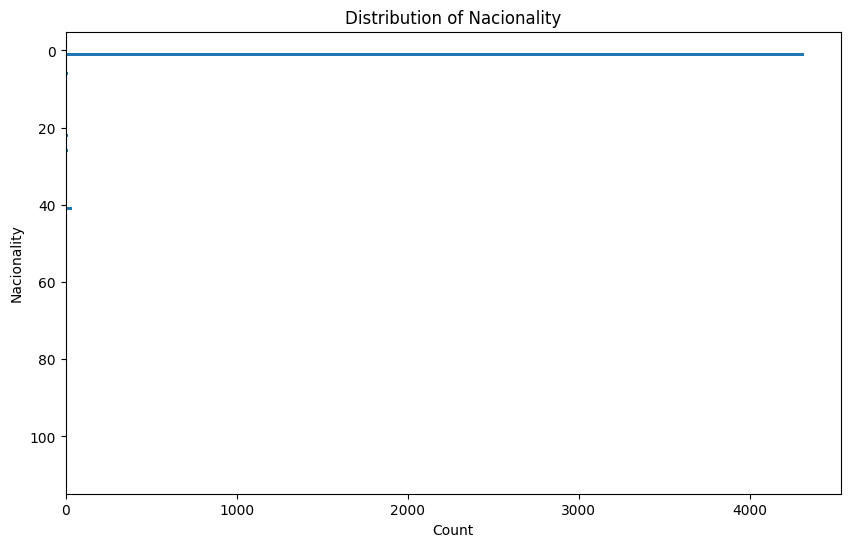

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(nacionality_distribution['Nacionality'], nacionality_distribution['count'])
plt.xlabel("Count")
plt.ylabel("Nacionality")
plt.title("Distribution of Nacionality")
plt.gca().invert_yaxis()  # Reverse the order to have the highest count at the top
plt.show()

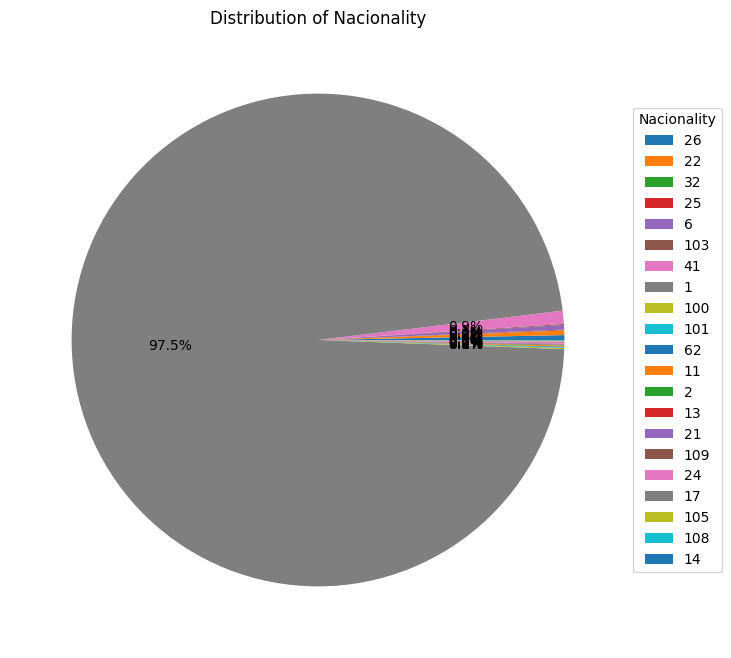

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(nacionality_distribution['count'], autopct='%1.1f%%')
plt.title("Distribution of Nacionality")

# Add a legend
plt.legend(nacionality_distribution['Nacionality'], title="Nacionality", loc="center left", bbox_to_anchor=(1, 0.5))

plt.show()

In [ ]:
#LETS SHOW THE DISTRIBUTION OF MARITAL STATUS

# Show the distribution of the "Marital status" column
Marital_status_distribution = df.groupBy("Marital status").count()
Marital_status_distribution.show()

+--------------+-----+
|Marital status|count|
+--------------+-----+
|             6|    6|
|             5|   25|
|             1| 3919|
|             3|    4|
|             2|  379|
|             4|   91|
+--------------+-----+



1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

Predominately single

In [ ]:
# LETS SEE IF THERE IS ANY CORRELATION BETWEEN TUITION FEES UP TO DATE TO ANY OTHER ATTRIBUTE

from pyspark.sql.functions import corr

# Calculate the correlation between "Tuition fees up to date" and all other attributes
correlation_matrix = df.select([corr("Tuition fees up to date", col).alias(col) for col in df.columns])

# Show the correlation matrix
correlation_matrix.show()

+--------------------+--------------------+------------------+--------------------+----------------------------+----------------------+------------------------------+--------------------+----------------------+----------------------+--------------------+--------------------+-------------------+-------------------+-------------------------+--------------------+-----------------------+--------------------+-------------------+--------------------+--------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+--------------------+--------------------+--------------------+------+
|     

Debtor 1 – yes 0 – no
Tuition Fee up to date 1 – yes 0 – no

In [ ]:
#LETS CHANGE THE DATA TYPE OF GENDER

from pyspark.sql.functions import when

# Replace values 1 and 0 with "Male" and "Female" in the "Gender" column
df_gender = df.withColumn("Gender", when(df["Gender"] == "1", "Male").otherwise("Female"))

# Show the modified DataFrame
df_gender.show()

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previou

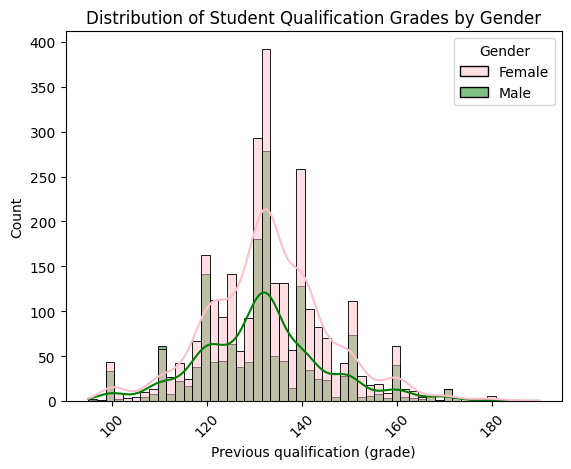

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = df_gender.toPandas()

# Import seaborn and set the color palette
import seaborn as sns
my_pal = {"Female": "Pink", "Male": "Green"}

# Create a histogram using seaborn
sns.histplot(data=pandas_df, x="Previous qualification (grade)", kde=True, hue="Gender", palette=my_pal, hue_order=["Female", "Male"])

# Add a title
plt.title("Distribution of Student Qualification Grades by Gender")

# Rotate x-axis labels
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

In [ ]:
from pyspark.ml.feature import Bucketizer
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Cast the "Previous qualification (grade)" column to a numeric type
df_gender = df_gender.withColumn("Previous qualification (grade)", df_gender["Previous qualification (grade)"].cast(FloatType()))

# Define the boundaries for discretization
boundaries = [-float('inf'), 20, 40, 60, 80, 100, 120, 140, 160, 180, float('inf')]

# Create a Bucketizer transformer
bucketizer = Bucketizer(splits=boundaries, inputCol="Previous qualification (grade)", outputCol="Grade Bucket")

# Apply the bucketizer to the DataFrame
df_gender = bucketizer.transform(df_gender)

# Define a user-defined function (UDF) to map bucket values to labels
def map_bucket_to_label(bucket):
    labels = ["< 20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140-160", "160-180", "> 180"]
    return labels[int(bucket)]

# Register the UDF
map_bucket_udf = udf(map_bucket_to_label, StringType())

# Apply the UDF to create a new column with bucket labels
df_gender = df_gender.withColumn("Grade Label", map_bucket_udf(col("Grade Bucket")))

# Show the modified DataFrame
df_gender.select("Previous qualification (grade)", "Grade Bucket", "Grade Label").show()

+------------------------------+------------+-----------+
|Previous qualification (grade)|Grade Bucket|Grade Label|
+------------------------------+------------+-----------+
|                         122.0|         6.0|    120-140|
|                         160.0|         8.0|    160-180|
|                         122.0|         6.0|    120-140|
|                         122.0|         6.0|    120-140|
|                         100.0|         5.0|    100-120|
|                         133.1|         6.0|    120-140|
|                         142.0|         7.0|    140-160|
|                         119.0|         5.0|    100-120|
|                         137.0|         6.0|    120-140|
|                         138.0|         6.0|    120-140|
|                         139.0|         6.0|    120-140|
|                         136.0|         6.0|    120-140|
|                         133.0|         6.0|    120-140|
|                         110.0|         5.0|    100-120|
|             

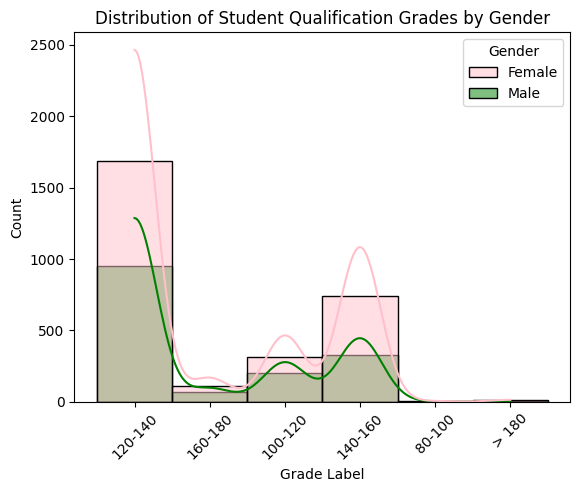

In [ ]:
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
pandas_df = df_gender.toPandas()

# Import seaborn and set the color palette
import seaborn as sns
my_pal = {"Female": "Pink", "Male": "Green"}

# Create a histogram using seaborn
sns.histplot(data=pandas_df, x="Grade Label", kde=True, hue="Gender", palette=my_pal, hue_order=["Female", "Male"])

# Add a title
plt.title("Distribution of Student Qualification Grades by Gender")

# Rotate x-axis labels
plt.xticks(rotation=45)  # Adjust the rotation angle as needed

# Show the plot
plt.show()

##PCA

In [ ]:
print('datasource.shape:', df_source.shape)
df.toPandas()

datasource.shape: (4424, 37)


Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1                       1   
2                                1                       1   
3                                1                       1   
4                                0                       1   
...                            ...                     ...   
4419                             1                       1   
4420                             1                       1   
4421                             1                       1   
4422                             1                       1   
4423                             1                       1   

      Previous qualification (grade)  Nacionality  Mother's qualification  \
0                              122.0            1                      19   
1                              160.0            1                       1   
2                              122.0            1                      37   
3                              122.0            1                      38   
4                              100.0            1                      37   
...                              ...          ...                     ...   
4419                           125.0            1                       1   
4420                           120.0          105                       1   
4421                           154.0            1                      37   
4422                           180.0            1                      37   
4423                           152.0           22                      38   

      Father's qualification  ...  Curricular units 2nd sem (credited)  \
0                         12  ...                                    0   
1                          3  ...                                    0   
2                         37  ...                                    0   
3                         37  ...                                    0   
4                         38  ...                                    0   
...                      ...  ...                                  ...   
4419                       1  ...                                    0   
4420                       1  ...                                    0   
4421                      37  ...                                    0   
4422                      37  ...                                    0   
4423                      37  ...                                    0   

      Curricular units 2nd sem (enrolled)  \
0                                       0   
1                                       6   
2                                       6   
3                                       6   
4                                       6   
...                                   ...   
4419                                    6   
4420                                    6   
4421                                    8   
4422                                    5   
4423                                    6   

      Curricular units 2nd sem (evaluations)  \
0                            

In [ ]:
column_names[:-1]

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
education_pipe = Pipeline(stages = [

    # assemble all independent variables into a single vector called features
    feature.VectorAssembler(inputCols = column_names[:-1],
                           outputCol = 'features'),

    # standarize features
    feature.StandardScaler(withMean = True,
                           inputCol = 'features',
                           outputCol = 'zfeatures'),

    # build a principal component object with the same number of components as features
    feature.PCA(k = 36,
                inputCol = 'zfeatures',
                outputCol = 'scores')

    ]).fit(df)

The `loadings` array are phi coefficients that are used to perform the linear combination of column vectors in the dataset. The linear combination of column vectors forms a principal component where each principal component captures a degree of variance in the data.
<br>
<br>
The first principal component captures the highest degree of variance, the 2nd principal component captures the next highest degree of variance in an *orthogonal* direction, etc.
<br>
<br>
Each loading vector represents a specific direction in the data set's p-dimensional space (where p is the number of features) which captures variance.
<br>
<br>
The direction of the loading vector associated with the first principal component represents the direction which captures the most variance in the data. The loading vector associated with the 2nd principal component is orthogonal to the 1st component and captures the 2nd most varinace, etc.

The last stage of our pipeline is the PCA object.

In [ ]:
loadings = education_pipe.stages[-1].pc.toArray()

In [ ]:
print('loadings.shape', loadings.shape)

loadings.shape (36, 36)


In [ ]:
# print the first column of the loading matrix - the first principal component
print(loadings[:,0])

[-0.01590315 -0.05823471  0.01468093 -0.13183716  0.01821785 -0.04504602
  0.00082044  0.00854669 -0.01753004 -0.01810322  0.00366906  0.00593442
 -0.00785495  0.01884603  0.01318557  0.02820815 -0.07540522  0.06180353
 -0.02756317 -0.03295358  0.00306203 -0.28802177 -0.35829564 -0.29938362
 -0.35670883 -0.25515847 -0.04493092 -0.28759206 -0.34905986 -0.29219946
 -0.33451283 -0.254296   -0.02164068 -0.02333475  0.00117834  0.00727949]


The proportion of explained variance associated with each of the principal components is found in the `explainedVariance` attribute of the PCA object. The explained variance shows the percentage of variance captured by each of the principal components. For example, the first component captures 17.67 percent of the total variance in the diabetes dataset. The 2nd component captures 9.89 percent of the total variance.

In [ ]:
education_pipe.stages[-1].explainedVariance

DenseVector([0.1767, 0.0989, 0.0586, 0.0559, 0.0526, 0.0467, 0.0443, 0.0427, 0.0359, 0.0344, 0.0302, 0.0281, 0.0274, 0.0259, 0.0242, 0.0226, 0.022, 0.0202, 0.0177, 0.0163, 0.0157, 0.0148, 0.0128, 0.0126, 0.0115, 0.0107, 0.0088, 0.0067, 0.0058, 0.0053, 0.0047, 0.0029, 0.0025, 0.0024, 0.001, 0.0006])

Note that if we sum the explained variance vector that it sums to 1 (or 100%, or very very close to 100%).

In [ ]:
sum(education_pipe.stages[-1].explainedVariance)

0.9999999999999999

The cell below generates a 'scree plot' using the `explainedVariance` attribute.

Text(0, 0.5, 'Proportion Variance Explained')

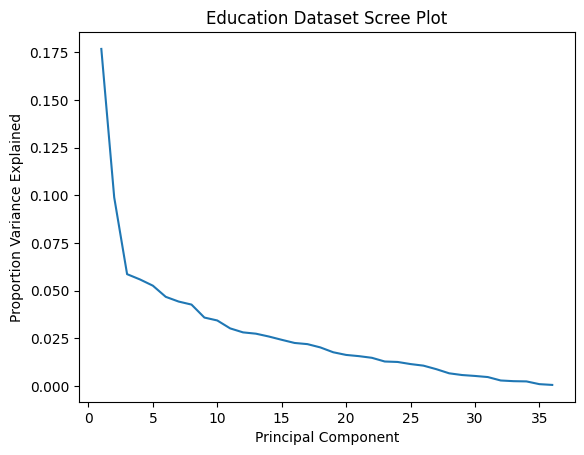

In [ ]:
plt.figure()
explained_var = education_pipe.stages[-1].explainedVariance
plt.plot(np.arange(1, len(explained_var) + 1), explained_var)
plt.title('Education Dataset Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion Variance Explained')

Here is another way of looking at the explained variance — plot the cumulative variance vs. the principal components.

Text(0, 0.5, 'Cumulative Sum of Variance Explained')

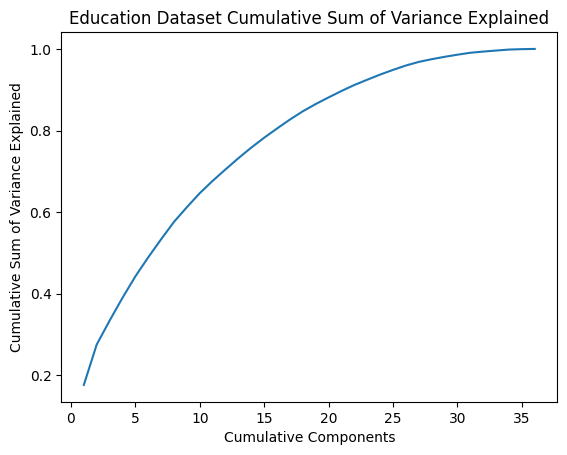

In [ ]:
cum_sum = np.cumsum(explained_var)
plt.figure()
plt.plot(np.arange(1, len(explained_var)+1), cum_sum)
plt.title('Education Dataset Cumulative Sum of Variance Explained')
plt.xlabel('Cumulative Components')
plt.ylabel('Cumulative Sum of Variance Explained')

Next, we will transform the `education` DataFrame, using `education_pipe`, and show the first row of standardized features and PCA scores.

The scores are produced by projecting the data observations (rows) onto the loading vectors. A projection is performed by multiplying the loading vector by the data observations which "projects" the observation in the direction of the loading vector.

In [ ]:
first_row_scores = education_pipe.transform(df)\
  .select('zfeatures', 'scores')\
  .take(1)

print(first_row_scores)

[Row(zfeatures=DenseVector([-0.2948, -0.0955, 2.4906, -4.209, 0.35, -0.3502, -0.8048, -0.1263, -0.036, -0.6697, -0.2256, -0.0804, 0.0222, 0.9074, -0.108, -0.3581, 0.3681, 1.3575, -0.5748, -0.4303, -0.1597, -0.3008, -2.5283, -1.9858, -1.5211, -2.1969, -0.1993, -0.2824, -2.838, -2.0424, -1.4714, -1.9633, -0.1994, -0.2876, 0.1244, 0.7657]), scores=DenseVector([6.1006, -0.2968, 1.4283, -0.4727, 0.8012, -2.0605, 2.7216, 0.6285, -0.2502, 1.3553, 0.7027, -0.4713, -0.194, -0.5873, -0.6595, 0.4683, 2.3093, 0.3434, 0.7854, -1.4309, 0.4607, -0.4274, -0.388, -0.7327, 0.4815, -0.1382, 0.3428, -0.2231, 0.0015, 0.0168, 0.023, 0.1822, 0.0282, 0.0914, 0.0098, 0.0042]))]


In [ ]:
display(education_pipe\
        .transform(df)\
        .select('features', 'zfeatures', 'scores')\
        .toPandas()\
        .head())

features  \
0                     (1.0, 17.0, 5.0, 171.0, 1.0, 1.0, 122.0, 1.0, 19.0, 12.0, 5.0, 9.0, 127.3, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
1     [1.0, 15.0, 1.0, 9254.0, 1.0, 1.0, 160.0, 1.0, 1.0, 3.0, 3.0, 3.0, 142.5, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 6.0, 6.0, 14.0, 0.0, 0.0, 6.0, 6.0, 6.0, 13.666666666666666, 0.0, 13.9, -0.3, 0.79]   
2                     (1.0, 1.0, 5.0, 9070.0, 1.0, 1.0, 122.0, 1.0, 37.0, 37.0, 9.0, 9.0, 124.8, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
3  [1.0, 17.0, 2.0, 9773.0, 1.0, 1.0, 122.0, 1.0, 38.0, 37.0, 5.0, 3.0, 119.6, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 6.0, 8.0, 6.0, 13.428571428571429, 0.0, 0.0, 6.0, 10.0, 5.0, 12.4, 0.0, 9.4, -0.8, -3.12]   
4   [2.0, 39.0, 1.0, 8014.0, 0.0, 1.0, 100.0, 1.0, 37.0, 38.0, 9.0, 9.0, 141.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 45.0, 0.0, 0.0, 6.0, 9.0, 5.0, 12.333333333333334, 0.0, 0.0, 6.0, 6.0, 6.0, 13.0, 0.0, 13.9, -0.3, 0.79]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            zfeatures  \
0     [-0.29479542523834257, -0.09545942728075835, 2.490614353679872, -4.209044382059621, 0.35004288814867923, -0.350190901804015, -0.804750289574901, -0.12628388309767105, -0.03601411204792362, -0.6697024214521288, -0.2256354778245091, -0.08044652066708653, 0.02222625554444042, 0.9074093589152447, -0.10798073018274909, -0.35812651943803653, 0.3680937112132549, 1.357487026431388, -0.5748492008281618, -0.430314181461332, -0.15966406523791193, -0.3007790584691975, -2.528273848501464, -1.985843739910881, -1.5210854473866746, -2.1968540624918256, -0.19925050839486685, -0.2824103874861908, -2.838015767425635, -2.0423990213780967, -1.4713605593185919, -1.9632666971729609, -0.19941844907551123, -0.28760594673799655, 0.1243724142439571, 0.765674283903897]   
1         [-0.29479542523834257, -0.20984526322065, -0.5540051270274384, 0.19255855579832182, 0.35004288814867923, -0.350190901804015, 2.076584583182004, -0.12628388309767105, -1.1896246392402565, -1.256285016650729, -0.30134071114107863, -0.31794762672727606, 1.0718049836588595, 0.9074093589152447, -0.10798073018274909, -0.35812651943803653, -2.716085414558412, 1.357487026431388, -0.5748492008281618, -0.5621044160604988, -0.15966406523791193, -0.3007790584691975, -0.1090928155674377, -0.550129829187893, 0.4180026380725482, 0.6935202058540791, -0.19925050839486685, -0.2824103874861908, -0.10571405437401711, -0.5226232974640964, 0.5188450402815241, 0.6594871608896753, -0.19941844907551123, 0.8761230306454852, -1.10509663550099, 0.34716017872948685]   
2  [-0.29479542523834257, -1.0105461147998915, 2.490614353679872, 0.10339253790050597, 0.35004288814867923, -0.350190901804015, -0.804750289574901, -0.12628388309767105, 1.1175964151444093, 0.9596936763217602, -0.07422501119136997, -0.08044652066708653, -0.15040182473753635, 0.9074093589152447, -0.10798073018274909, -0.35812651943803653, -2.716085414558412, 1.357487026431388, -0.5748492008281618, -0.5621044160604988, -0.15966406523791193, -0.3007790584691975, -0.1090928155674377, -1.985843739910881, -1.5210854473866746, -2.1968540624918256, -0.19925050839486685, -0.2824103874861908, -0.10571405437401711, -2

Assign the first row of standardized features to the variable `z`.

In [ ]:
z = education_pipe\
  .transform(df)\
  .select('zfeatures', 'scores')\
  .first()['zfeatures']

z

DenseVector([-0.2948, -0.0955, 2.4906, -4.209, 0.35, -0.3502, -0.8048, -0.1263, -0.036, -0.6697, -0.2256, -0.0804, 0.0222, 0.9074, -0.108, -0.3581, 0.3681, 1.3575, -0.5748, -0.4303, -0.1597, -0.3008, -2.5283, -1.9858, -1.5211, -2.1969, -0.1993, -0.2824, -2.838, -2.0424, -1.4714, -1.9633, -0.1994, -0.2876, 0.1244, 0.7657])

Assign the first row scores to the variable `pipeline_scores`

In [ ]:
pipeline_scores = education_pipe\
  .transform(df)\
  .select('zfeatures', 'scores')\
  .first()['scores']

pipeline_scores

DenseVector([6.1006, -0.2968, 1.4283, -0.4727, 0.8012, -2.0605, 2.7216, 0.6285, -0.2502, 1.3553, 0.7027, -0.4713, -0.194, -0.5873, -0.6595, 0.4683, 2.3093, 0.3434, 0.7854, -1.4309, 0.4607, -0.4274, -0.388, -0.7327, 0.4815, -0.1382, 0.3428, -0.2231, 0.0015, 0.0168, 0.023, 0.1822, 0.0282, 0.0914, 0.0098, 0.0042])

The purpose of the next cell is to show that if we multiply the first loading vector by the first observation row we will obtain the same score which we extracted from the pipeline above.

The matrix dot product of a standardized observation with the loadings vector projects the observation onto the loading vector. Also note that the resulting score is equal to the score for the first row computed by the pipeline above.

In [ ]:
scores = z.dot(loadings[:,0])

print(scores)

6.100603990523409


In the next cell, we multiply the first observation row of the data by all of the loading vectors producing a score for each of the 10 principal components.  Note that the resulting array of scores is equal to the scores for the first row computed by the pipeline above.

In [ ]:
scores = z.dot(loadings)

print(scores)

[ 6.10060399e+00 -2.96757354e-01  1.42832915e+00 -4.72746337e-01
  8.01173587e-01 -2.06048114e+00  2.72156399e+00  6.28460671e-01
 -2.50172545e-01  1.35532430e+00  7.02700201e-01 -4.71252271e-01
 -1.94043423e-01 -5.87286197e-01 -6.59514352e-01  4.68262356e-01
  2.30927690e+00  3.43377906e-01  7.85359478e-01 -1.43087975e+00
  4.60736679e-01 -4.27393271e-01 -3.87967498e-01 -7.32711276e-01
  4.81457597e-01 -1.38155312e-01  3.42755553e-01 -2.23063654e-01
  1.51433381e-03  1.67788320e-02  2.29900497e-02  1.82202280e-01
  2.81922775e-02  9.13532212e-02  9.76678949e-03  4.24222450e-03]


The purpose of the following cell is to show that we can do an inverse transform which transforms the scores from the projection space back to the original data. The dot product of the loading vectors with the scores produces an approximation of the original observation row held in variable `z`.

The more loadings we use for the inverse transform, the closer the approximation to the original observation row. The cell below computes the original data using from between 20 and 36 loading vectors.  Notice how the resulting transformed data gets closer to the original data held in 'z' above as the number of loading vectors increases.

In [ ]:
print('All loadings shape: ', loadings.shape)
print('All scores shape: ', scores.shape)
print()

num_loadings = loadings.shape[1]
for i in np.arange(20, num_loadings+1):
    print('Number of loadings: ', i)
    print('Loadings shape: ', loadings[:,:i].shape)
    print('Scores shape: ', scores[:i].shape)

    # the following is the scores dot loadings transpose
    print('Scores shape', scores[:i].reshape((1,i)).shape)
    print('loadings[:,:i].T.shape', loadings[:,:i].T.shape)
    inverse_xform = np.dot(scores[:i].reshape((1,i)), loadings[:,:i].T)

    print('inverse_xform shape: ', inverse_xform.shape)
    print('inverse_xform: ', inverse_xform)
    print('compare to z: ', np.round(z, 8))
    print()

All loadings shape:  (36, 36)
All scores shape:  (36,)

Number of loadings:  20
Loadings shape:  (36, 20)
Scores shape:  (20,)
Scores shape (1, 20)
loadings[:,:i].T.shape (20, 36)
inverse_xform shape:  (1, 36)
inverse_xform:  [[-0.11280647 -0.5928828   2.24804721 -4.08327316  0.16672531 -0.07419172
  -0.65851553 -0.07765704 -0.3243449  -0.45114169 -0.19385587 -0.15989209
  -0.18101784  1.14345092 -0.10455966  0.09424003  0.89089898  1.48002575
  -0.58449008 -0.37343787 -0.16368296 -0.31811384 -2.34724424 -2.1114267
  -1.63224356 -2.28544967 -0.4695305  -0.31550573 -2.59195245 -2.01139255
  -1.6062892  -2.02373152  0.03811793 -0.38901895  0.06104026  0.60407071]]
compare to z:  [-0.29479543 -0.09545943  2.49061435 -4.20904438  0.35004289 -0.3501909
 -0.80475029 -0.12628388 -0.03601411 -0.66970242 -0.22563548 -0.08044652
  0.02222626  0.90740936 -0.10798073 -0.35812652  0.36809371  1.35748703
 -0.5748492  -0.43031418 -0.15966407 -0.30077906 -2.52827385 -1.98584374
 -1.52108545 -2.1968540

In [ ]:
list(zip(column_names[:-1],
         loadings[:, 0], loadings[:, 1]))

[('Marital status', -0.015903149215028056, 0.25006476197968297),
 ('Application mode', -0.05823471284583864, 0.35851177354663544),
 ('Application order', 0.014680929645608964, -0.2253814108501166),
 ('Course', -0.1318371591947824, -0.038921395490322086),
 ('Daytime/evening attendance\t', 0.018217846355295567, -0.2501863804643919),
 ('Previous qualification', -0.04504602396838388, 0.17064602062183168),
 ('Previous qualification (grade)',
  0.0008204435852400226,
  -0.06522204742095095),
 ('Nacionality', 0.008546687790354736, -0.006472119825022996),
 ("Mother's qualification", -0.017530039684597223, 0.1619866453237424),
 ("Father's qualification", -0.01810322403170832, 0.11611049579607507),
 ("Mother's occupation", 0.0036690637600290212, 0.07578258753554852),
 ("Father's occupation", 0.005934419575849909, 0.06390755185852517),
 ('Admission grade', -0.007854946988972893, -0.03457993603839317),
 ('Displaced', 0.018846033108692584, -0.2608386760163073),
 ('Educational special needs', 0.0131

In [ ]:
# Take the absolute value of the loadings
abs_loadings = np.abs(loadings)

# Get the top contributors for each principal component
top_contributors_pca1 = list(zip(column_names, abs_loadings[:, 0]))
top_contributors_pca2 = list(zip(column_names, abs_loadings[:, 1]))
top_contributors_pca3 = list(zip(column_names, abs_loadings[:, 2]))

# Print out the top contributors
print("Top Contributors for PCA 1:")
for feature, loading in sorted(top_contributors_pca1, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {loading}")

print("\nTop Contributors for PCA 2:")
for feature, loading in sorted(top_contributors_pca2, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {loading}")

print("\nTop Contributors for PCA 3:")
for feature, loading in sorted(top_contributors_pca3, key=lambda x: x[1], reverse=True):
    print(f"{feature}: {loading}")

Top Contributors for PCA 1:
Curricular units 1st sem (enrolled): 0.35829563963724237
Curricular units 1st sem (approved): 0.3567088277452324
Curricular units 2nd sem (enrolled): 0.3490598599925406
Curricular units 2nd sem (approved): 0.33451283168769574
Curricular units 1st sem (evaluations): 0.2993836191784319
Curricular units 2nd sem (evaluations): 0.2921994632997039
Curricular units 1st sem (credited): 0.28802176677937424
Curricular units 2nd sem (credited): 0.2875920607692257
Curricular units 1st sem (grade): 0.25515847146078874
Curricular units 2nd sem (grade): 0.2542960028727442
Course: 0.1318371591947824
Tuition fees up to date: 0.07540521747276496
Gender: 0.06180352985775267
Application mode: 0.05823471284583864
Previous qualification: 0.04504602396838388
Curricular units 1st sem (without evaluations): 0.04493091686245991
Age at enrollment: 0.03295357703364957
Debtor: 0.02820815428349215
Scholarship holder: 0.02756317388049667
Unemployment rate: 0.023334748025674226
Curricular 

In [ ]:
import pandas as pd
import plotly.express as px
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.sql import SparkSession

# Define the column names of the features
column_names = df.columns[:-1]

# Set the number of components for PCA
n_components = 5

# Create a pipeline
education_pipe = Pipeline(stages=[
    # Assemble all independent variables into a single vector called features
    VectorAssembler(inputCols=column_names, outputCol='features'),

    # Standardize features
    StandardScaler(withMean=True, inputCol='features', outputCol='zfeatures'),

    # Build a principal component object with the desired number of components
    PCA(k=n_components, inputCol='zfeatures', outputCol='scores')
])

# Fit the pipeline to the data
education_model = education_pipe.fit(df)

# Transform the data
df_transformed = education_model.transform(df)

# Extract principal components from the transformed data
components = df_transformed.select('scores').rdd.map(lambda x: x[0]).collect()

# Create labels for the principal components
labels = [f"PC {i+1}" for i in range(n_components)]

# Convert the principal components to a Pandas DataFrame
components_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target column to the Pandas DataFrame
components_df['target'] = df_transformed.select('target').rdd.map(lambda x: x[0]).collect()

# Create a scatter matrix using Plotly Express
fig = px.scatter_matrix(
    components_df,
    color='target',
    dimensions=[f'PC{i+1}' for i in range(n_components)],
    title=f'Total Explained Variance: {education_model.stages[-1].explainedVariance.sum() * 100:.2f}%',
)

# Manually add annotations with explained variance percentages
for i, label in enumerate(labels):
    fig.add_annotation(
        text=f"{label} ({education_model.stages[-1].explainedVariance[i]*100:.2f}% Variance)",
        x=0.5,
        y=0.5,
        showarrow=False,
        xref=f"x{i+1}",
        yref=f"y{i+1}",
        font=dict(size=10),
    )

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.sql import SparkSession

# Define the column names of the features
column_names = df.columns[:-1]

# Set the number of components for PCA
n_components = 10

# Create a pipeline
education_pipe = Pipeline(stages=[
    # Assemble all independent variables into a single vector called features
    VectorAssembler(inputCols=column_names, outputCol='features'),

    # Standardize features
    StandardScaler(withMean=True, inputCol='features', outputCol='zfeatures'),

    # Build a principal component object with the desired number of components
    PCA(k=n_components, inputCol='zfeatures', outputCol='scores')
])

# Fit the pipeline to the data
education_model = education_pipe.fit(df)

# Transform the data
df_transformed = education_model.transform(df)

# Extract principal components from the transformed data
components = df_transformed.select('scores').rdd.map(lambda x: x[0]).collect()

# Create labels for the principal components
labels = [f"PC {i+1}" for i in range(n_components)]

# Convert the principal components to a Pandas DataFrame
components_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target column to the Pandas DataFrame
components_df['target'] = df_transformed.select('target').rdd.map(lambda x: x[0]).collect()

# Create a scatter matrix using Plotly Express
fig = px.scatter_matrix(
    components_df,
    color='target',
    dimensions=[f'PC{i+1}' for i in range(n_components)],
    title=f'Total Explained Variance: {education_model.stages[-1].explainedVariance.sum() * 100:.2f}%',
)

# Manually add annotations with explained variance percentages
for i, label in enumerate(labels):
    fig.add_annotation(
        text=f"{label} ({education_model.stages[-1].explainedVariance[i]*100:.2f}% Variance)",
        x=0.5,
        y=0.5,
        showarrow=False,
        xref=f"x{i+1}",
        yref=f"y{i+1}",
        font=dict(size=10),
    )

fig.show()

In [ ]:
import pandas as pd
import plotly.express as px
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
from pyspark.sql import SparkSession

# Define the column names of the features
column_names = df.columns[:-1]

# Set the number of components for PCA
n_components = 20

# Create a pipeline
education_pipe = Pipeline(stages=[
    # Assemble all independent variables into a single vector called features
    VectorAssembler(inputCols=column_names, outputCol='features'),

    # Standardize features
    StandardScaler(withMean=True, inputCol='features', outputCol='zfeatures'),

    # Build a principal component object with the desired number of components
    PCA(k=n_components, inputCol='zfeatures', outputCol='scores')
])

# Fit the pipeline to the data
education_model = education_pipe.fit(df)

# Transform the data
df_transformed = education_model.transform(df)

# Extract principal components from the transformed data
components = df_transformed.select('scores').rdd.map(lambda x: x[0]).collect()

# Create labels for the principal components
labels = [f"PC {i+1}" for i in range(n_components)]

# Convert the principal components to a Pandas DataFrame
components_df = pd.DataFrame(components, columns=[f'PC{i+1}' for i in range(n_components)])

# Add the target column to the Pandas DataFrame
components_df['target'] = df_transformed.select('target').rdd.map(lambda x: x[0]).collect()

# Create a scatter matrix using Plotly Express
fig = px.scatter_matrix(
    components_df,
    color='target',
    dimensions=[f'PC{i+1}' for i in range(n_components)],
    title=f'Total Explained Variance: {education_model.stages[-1].explainedVariance.sum() * 100:.2f}%',
)

# Manually add annotations with explained variance percentages
for i, label in enumerate(labels):
    fig.add_annotation(
        text=f"{label} ({education_model.stages[-1].explainedVariance[i]*100:.2f}% Variance)",
        x=0.5,
        y=0.5,
        showarrow=False,
        xref=f"x{i+1}",
        yref=f"y{i+1}",
        font=dict(size=10),
    )

fig.show()

## K-Means

In [ ]:
# import the diabetes data set
# import data with pandas, then convert to a Spark DataFrame
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

# Get the list of column names
column_names = df.columns

column_features = column_names[:-1]

column_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
df.show()

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previou

In [ ]:
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA, Normalizer
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans

# Your pipeline definition
k_education_pipe = Pipeline(stages=[
    # assemble all independent variables into a single vector called features
    VectorAssembler(inputCols=column_features, outputCol='features'),

    # standardize features
    StandardScaler(withMean=True, inputCol='features', outputCol='zfeatures'),

    # build a principal component object with the same number of components as features (10)
    PCA(k=36, inputCol='zfeatures', outputCol='scores'),

    # defines a Normalizer which normalizes each row of data such that the sum of the squares of each element in the row is equal to 1 or unit length.
    Normalizer(inputCol='zfeatures', outputCol='norm_zfeatures', p=2.0),

    #Apply KMeans clustering with k=4 on the normalized features
    KMeans(k=4, featuresCol='norm_zfeatures', predictionCol='kmeans_feat')
])

# Now, you should be able to fit the pipeline
pipeline_model = k_education_pipe.fit(df)

For k=2, Silhouette Score: 0.17824929338040438
For k=3, Silhouette Score: 0.1436999203563714
For k=4, Silhouette Score: 0.17781105577844608
For k=5, Silhouette Score: 0.1674943058233955
For k=6, Silhouette Score: 0.18017763534922385
For k=7, Silhouette Score: 0.1882339133134472
For k=8, Silhouette Score: 0.19224328433136517
For k=9, Silhouette Score: 0.19583993722905962
For k=10, Silhouette Score: 0.1733605510435706


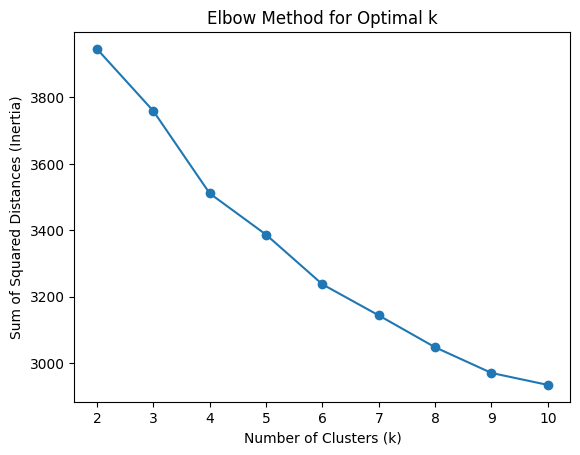

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.evaluation import ClusteringEvaluator

# List of candidate values for k
k_values = list(range(2, 11))

# Store the inertias for each k
inertias = []

for k in k_values:
    # Update the k value in the KMeans stage of the pipeline
    k_education_pipe.getStages()[-1].setK(k)

    # Fit the pipeline with the updated k value
    pipeline_model = k_education_pipe.fit(df)

    # Get the transformed data with cluster predictions
    df_transformed = pipeline_model.transform(df)

    # Evaluate clustering performance using the silhouette score
    evaluator = ClusteringEvaluator(predictionCol='kmeans_feat', featuresCol='norm_zfeatures')
    silhouette_score = evaluator.evaluate(df_transformed)
    print(f"For k={k}, Silhouette Score: {silhouette_score}")

    # Get the inertia (sum of squared distances)
    training_cost = pipeline_model.stages[-1].summary.trainingCost
    inertias.append(training_cost)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [ ]:
pipeline_model = k_education_pipe.fit(df)

In [ ]:
display(pipeline_model.transform(df).toPandas().head())

Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0            1                      37   
3                           122.0            1                      38   
4                           100.0            1                      37   

   Father's qualification  ...  \
0                      12  ...   
1                       3  ...   
2                      37  ...   
3                      37  ...   
4                      38  ...   

   Curricular units 2nd sem (without evaluations)  Unemployment rate  \
0                                               0               10.8   
1                                               0               13.9   
2                                               0               10.8   
3                                               0                9.4   
4                                               0               13.9   

   Inflation rate   GDP    Target  \
0             1.4  1.74   Dropout   
1            -0.3  0.79  Graduate   
2             1.4  1.74   Dropout   
3            -0.8 -3.12  Graduate   
4            -0.3  0.79  Graduate   

                                                                                                                                                                                                              features  \
0                     (1.0, 17.0, 5.0, 171.0, 1.0, 1.0, 122.0, 1.0, 19.0, 12.0, 5.0, 9.0, 127.3, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
1     [1.0, 15.0, 1.0, 9254.0, 1.0, 1.0, 160.0, 1.0, 1.0, 3.0, 3.0, 3.0, 142.5, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 6.0, 6.0, 14.0, 0.0, 0.0, 6.0, 6.0, 6.0, 13.666666666666666, 0.0, 13.9, -0.3, 0.79]   
2                     (1.0, 1.0, 5.0, 9070.0, 1.0, 1.0, 122.0, 1.0, 37.0, 37.0, 9.0, 9.0, 124.8, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
3  [1.0, 17.0, 2.0, 9773.0, 1.0, 1.0, 122.0, 1.0, 38.0, 37.0, 5.0, 3.0, 119.6, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 6.0, 8.0, 6.0, 13.428571428571429, 0.0, 0.0, 6.0, 10.0, 5.0, 12.4, 0.0, 9.4, -0.8, -3.12]   
4   [2.0, 39.0, 1.0, 8014.0, 0.0, 1.0, 100.0, 1.0, 37.0, 38.0, 9.0, 9.0, 141.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 45.0, 0.0, 0.0, 6.0, 9.0, 5.0, 12.333333333333334, 0.0, 0.0, 6.0, 6.0, 6.0, 13.0, 0.0, 13.9, -0.3, 0.79]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# scores col is the PCA scores
pipeline_model\
  .transform(df)\
  .select('course', 'scores', 'kmeans_feat')\
  .show(10, 60)

+------+------------------------------------------------------------+-----------+
|course|                                                      scores|kmeans_feat|
+------+------------------------------------------------------------+-----------+
|   171|[6.100603990523403,-0.29675735443459755,1.42832915062555,...|          0|
|  9254|[0.254478142160662,-1.1067361010430952,1.8415640055079154...|          3|
|  9070|[3.9539330147680465,0.446584539827091,-0.0075235916631744...|          0|
|  9773|[-0.42183713941467943,-0.958217871204111,-0.8841327179570...|          2|
|  8014|[-0.4056496655259999,2.790739855147222,-1.898279156553775...|          1|
|  9991|[-0.9393023299813923,4.967321635234505,-0.296042569796094...|          1|
|  9500|[-1.3744891644597004,-2.0000492236786336,-0.1917399148328...|          2|
|  9254|[3.384099322682315,1.4935236810927353,0.5172648038777976,...|          0|
|  9238|[-0.3015046445663098,-2.251490865471223,2.109554280260277...|          3|
|  9238|[0.20848

In [ ]:
model_df = pipeline_model.transform(df)

In [ ]:
from pyspark.sql.functions import when

# Define mapping dictionaries for Marital Status and Application mode
marital_status_mapping = {
    1: 'single',
    2: 'married',
    3: 'widower',
    4: 'divorced',
    5: 'facto union',
    6: 'legally separated'
}

application_mode_mapping = {
    1: '1st phase - general contingent',
    2: 'Ordinance No. 612/93',
    5: '1st phase - special contingent (Azores Island)',
    7: 'Holders of other higher courses',
    10: 'Ordinance No. 854-B/99',
    15: 'International student (bachelor)',
    16: '1st phase - special contingent (Madeira Island)',
    17: '2nd phase - general contingent',
    18: '3rd phase - general contingent',
    26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
    27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
    39: 'Over 23 years old',
    42: 'Transfer',
    43: 'Change of course',
    44: 'Technological specialization diploma holders',
    51: 'Change of institution/course',
    53: 'Short cycle diploma holders',
    57: 'Change of institution/course (International)'
}

course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

daytime_evening_attendance_mapping = {
    1: 'daytime',
    0: 'evening'
}

previous_qualification_mapping = {
    1: 'Secondary education',
    2: "Higher education - bachelor's degree",
    3: 'Higher education - degree',
    4: "Higher education - master's",
    5: 'Higher education - doctorate',
    6: 'Frequency of higher education',
    9: '12th year of schooling - not completed',
    10: '11th year of schooling - not completed',
    12: 'Other - 11th year of schooling',
    14: '10th year of schooling',
    15: '10th year of schooling - not completed',
    19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
    38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
    39: 'Technological specialization course',
    40: 'Higher education - degree (1st cycle)',
    42: 'Professional higher technical course',
    43: 'Higher education - master (2nd cycle)'
}

nationality_mapping = {
    1: 'Portuguese',
    2: 'German',
    6: 'Spanish',
    11: 'Italian',
    13: 'Dutch',
    14: 'English',
    17: 'Lithuanian',
    21: 'Angolan',
    22: 'Cape Verdean',
    24: 'Guinean',
    25: 'Mozambican',
    26: 'Santomean',
    32: 'Turkish',
    41: 'Brazilian',
    62: 'Romanian',
    100: 'Moldova (Republic of)',
    101: 'Mexican',
    103: 'Ukrainian',
    105: 'Russian',
    108: 'Cuban',
    109: 'Colombian'
}

mothers_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    14: '10th Year of Schooling',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    22: 'Technical-Professional Course',
    26: '7th Year of Schooling',
    27: '2nd Cycle of the General High School Course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    34: 'Unknown',
    35: "Can't Read or Write",
    36: 'Can Read Without Having a 4th Year of Schooling',
    37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)',
    44: 'Higher Education - Doctorate (3rd Cycle)'
}

fathers_qualification_mapping = {
    1: 'Secondary Education - 12th Year of Schooling or Eq.',
    2: "Higher Education - Bachelor's Degree",
    3: 'Higher Education - Degree',
    4: "Higher Education - Master's",
    5: "Higher Education - Doctorate",
    6: 'Frequency of Higher Education',
    9: '12th Year of Schooling - Not Completed',
    10: '11th Year of Schooling - Not Completed',
    11: '7th Year (Old)',
    12: 'Other - 11th Year of Schooling',
    13: '2nd Year Complementary High School Course',
    14: '10th Year of Schooling',
    18: 'General Commerce Course',
    19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    20: 'Complementary High School Course',
    22: 'Technical-Professional Course',
    25: 'Complementary High School Course - Not Concluded',
    26: '7th Year of Schooling',
    27: '2nd Cycle of the General High School Course',
    29: '9th Year of Schooling - Not Completed',
    30: '8th Year of Schooling',
    31: 'General Course of Administration and Commerce',
    33: 'Supplementary Accounting and Administration',
    34: 'Unknown',
    35: "Can't Read or Write",
    36: 'Can Read Without Having a 4th Year of Schooling',
    37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
    38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    39: 'Technological Specialization Course',
    40: 'Higher Education - Degree (1st Cycle)',
    41: 'Specialized Higher Studies Course',
    42: 'Professional Higher Technical Course',
    43: 'Higher Education - Master (2nd Cycle)',
    44: 'Higher Education - Doctorate (3rd Cycle)'
}

mothers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative Staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(Blank)',
    122: 'Health Professionals',
    123: 'Teachers',
    125: 'Specialists in Information and Communication Technologies (ICT)',
    131: 'Intermediate Level Science and Engineering Technicians and Professions',
    132: 'Technicians and Professionals of Intermediate Level of Health',
    134: 'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',
    141: 'Office Workers, Secretaries in General, and Data Processing Operators',
    143: 'Data, Accounting, Statistical, Financial Services, and Registry-Related Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and the Like',
    171: 'Skilled Construction Workers and the Like, Except Electricians',
    173: 'Skilled Workers in Printing, Precision Instrument Manufacturing, Jewelers, Artisans, and the Like',
    175: 'Workers in Food Processing, Woodworking, Clothing, and Other Industries and Crafts',
    191: 'Cleaning Workers',
    192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries, and Forestry',
    193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',
    194: 'Meal Preparation Assistants'
}

fathers_occupation_mapping = {
    0: 'Student',
    1: 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors, and Executive Managers',
    2: 'Specialists in Intellectual and Scientific Activities',
    3: 'Intermediate Level Technicians and Professions',
    4: 'Administrative Staff',
    5: 'Personal Services, Security and Safety Workers, and Sellers',
    6: 'Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry',
    7: 'Skilled Workers in Industry, Construction, and Craftsmen',
    8: 'Installation and Machine Operators and Assembly Workers',
    9: 'Unskilled Workers',
    10: 'Armed Forces Professions',
    90: 'Other Situation',
    99: '(Blank)',
    101: 'Armed Forces Officers',
    102: 'Armed Forces Sergeants',
    103: 'Other Armed Forces Personnel',
    112: 'Directors of Administrative and Commercial Services',
    114: 'Hotel, Catering, Trade, and Other Services Directors',
    121: 'Specialists in the Physical Sciences, Mathematics, Engineering, and Related Techniques',
    122: 'Health Professionals',
    123: 'Teachers',
    124: 'Specialists in Finance, Accounting, Administrative Organization, Public and Commercial Relations',
    131: 'Intermediate Level Science and Engineering Technicians and Professions',
    132: 'Technicians and Professionals of Intermediate Level of Health',
    134: 'Intermediate Level Technicians from Legal, Social, Sports, Cultural, and Similar Services',
    135: 'Information and Communication Technology Technicians',
    141: 'Office Workers, Secretaries in General, and Data Processing Operators',
    143: 'Data, Accounting, Statistical, Financial Services, and Registry-Related Operators',
    144: 'Other Administrative Support Staff',
    151: 'Personal Service Workers',
    152: 'Sellers',
    153: 'Personal Care Workers and the Like',
    154: 'Protection and Security Services Personnel',
    161: 'Market-Oriented Farmers and Skilled Agricultural and Animal Production Workers',
    163: 'Farmers, Livestock Keepers, Fishermen, Hunters and Gatherers, Subsistence',
    171: 'Skilled Construction Workers and the Like, Except Electricians',
    172: 'Skilled Workers in Metallurgy, Metalworking, and Similar',
    174: 'Skilled Workers in Electricity and Electronics',
    175: 'Workers in Food Processing, Woodworking, Clothing, and Other Industries and Crafts',
    181: 'Fixed Plant and Machine Operators',
    182: 'Assembly Workers',
    183: 'Vehicle Drivers and Mobile Equipment Operators',
    192: 'Unskilled Workers in Agriculture, Animal Production, Fisheries, and Forestry',
    193: 'Unskilled Workers in Extractive Industry, Construction, Manufacturing, and Transport',
    194: 'Meal Preparation Assistants',
    195: 'Street Vendors (Except Food) and Street Service Providers'
}

displaced_mapping = {
    1: 'Displaced',
    0: 'Not Displaced'
}

education_special_needs_mapping = {
    1: 'Has Special Needs',
    0: 'No Special Needs'
}

debtor_mapping = {
    1: 'Debtor',
    0: 'No Debtor'
}

tuition_fees_mapping = {
    1: 'Tuition Fees Up to Date',
    0: 'Tuition Fees NOT Up to Date'
}

gender_mapping = {
    1: 'Male',
    0: 'Female'
}

scholarship_holder_mapping = {
    1: 'Scholarship Holder',
    0: 'No Scholarship'
}

international_mapping = {
    1: 'International Student',
    0: 'Not International Student'
}

from pyspark.sql.functions import col, when
import pandas as pd

# Convert DataFrame to Pandas for mapping
model_df_pd = model_df.toPandas()

# Apply the mappings using Pandas map function
model_df_pd['Marital status'] = model_df_pd['Marital status'].map(marital_status_mapping)
model_df_pd['Application mode'] = model_df_pd['Application mode'].map(application_mode_mapping)
model_df_pd['Course'] = model_df_pd['Course'].map(course_mapping)
model_df_pd['Daytime/evening attendance\t'] = model_df_pd['Daytime/evening attendance\t'].map(daytime_evening_attendance_mapping)
model_df_pd['Previous qualification'] = model_df_pd['Previous qualification'].map(previous_qualification_mapping)
model_df_pd['Nacionality'] = model_df_pd['Nacionality'].map(nationality_mapping)
model_df_pd["Mother's qualification"] = model_df_pd["Mother's qualification"].map(mothers_qualification_mapping)
model_df_pd["Father's qualification"] = model_df_pd["Father's qualification"].map(fathers_qualification_mapping)
model_df_pd["Mother's occupation"] = model_df_pd["Mother's occupation"].map(mothers_occupation_mapping)
model_df_pd["Father's occupation"] = model_df_pd["Father's occupation"].map(fathers_occupation_mapping)
model_df_pd['Displaced'] = model_df_pd['Displaced'].map(displaced_mapping)
model_df_pd['Educational special needs'] = model_df_pd['Educational special needs'].map(education_special_needs_mapping)
model_df_pd['Debtor'] = model_df_pd['Debtor'].map(debtor_mapping)
model_df_pd['Tuition fees up to date'] = model_df_pd['Tuition fees up to date'].map(tuition_fees_mapping)
model_df_pd['Gender'] = model_df_pd['Gender'].map(gender_mapping)
model_df_pd['Scholarship holder'] = model_df_pd['Scholarship holder'].map(scholarship_holder_mapping)
model_df_pd['International'] = model_df_pd['International'].map(international_mapping)

# Convert back to Spark DataFrame
model_df = spark.createDataFrame(model_df_pd)

# Show the updated DataFrame
model_df.show()

+--------------+--------------------+-----------------+--------------------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+--------------------+--------------------+---------------+-------------+-------------------------+---------+-----------------------+------+------------------+-----------------+--------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+--------------------+--------------------+--------------------+--------------------+

In [ ]:
column_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
from pyspark.sql.functions import col, concat_ws

# Set the display option
pd.set_option('display.max_colwidth', None)

# Display the DataFrame head
display('Education head: ', model_df.toPandas().head())

# Display students grouped by k-means group with concatenated columns
display('Students grouped by k-means group: ',
        model_df.\
        groupBy('kmeans_feat').agg(
            f.collect_list(
                concat_ws('-', *[col(column) for column in df.columns[:-1]])
            ).alias('concatenated_columns')
        ).toPandas().head())

'Education head: '

Marital status                  Application mode  Application order  \
0         single    2nd phase - general contingent                  5   
1         single  International student (bachelor)                  1   
2         single    1st phase - general contingent                  5   
3         single    2nd phase - general contingent                  2   
4        married                 Over 23 years old                  1   

                                Course Daytime/evening attendance\t  \
0      Animation and Multimedia Design                      daytime   
1                              Tourism                      daytime   
2                 Communication Design                      daytime   
3         Journalism and Communication                      daytime   
4  Social Service (evening attendance)                      evening   

  Previous qualification  Previous qualification (grade) Nacionality  \
0    Secondary education                           122.0  Portuguese   
1    Secondary education                           160.0  Portuguese   
2    Secondary education                           122.0  Portuguese   
3    Secondary education                           122.0  Portuguese   
4    Secondary education                           100.0  Portuguese   

                                     Mother's qualification  \
0  Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.   
1       Secondary Education - 12th Year of Schooling or Eq.   
2        Basic Education 1st Cycle (4th/5th Year) or Equiv.   
3    Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.   
4        Basic Education 1st Cycle (4th/5th Year) or Equiv.   

                                   Father's qualification  ...  \
0                          Other - 11th Year of Schooling  ...   
1                               Higher Education - Degree  ...   
2      Basic Education 1st Cycle (4th/5th Year) or Equiv.  ...   
3      Basic Education 1st Cycle (4th/5th Year) or Equiv.  ...   
4  Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.  ...   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              10.8   
1                                              0              13.9   
2                                              0              10.8   
3                                              0               9.4   
4                                              0              13.9   

   Inflation rate   GDP    Target  \
0             1.4  1.74   Dropout   
1            -0.3  0.79  Graduate   
2             1.4  1.74   Dropout   
3            -0.8 -3.12  Graduate   
4            -0.3  0.79  Graduate   

                                                                                                                                                                                                              features  \
0                     (1.0, 17.0, 5.0, 171.0, 1.0, 1.0, 122.0, 1.0, 19.0, 12.0, 5.0, 9.0, 127.3, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
1     [1.0, 15.0, 1.0, 9254.0, 1.0, 1.0, 160.0, 1.0, 1.0, 3.0, 3.0, 3.0, 142.5, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 6.0, 6.0, 14.0, 0.0, 0.0, 6.0, 6.0, 6.0, 13.666666666666666, 0.0, 13.9, -0.3, 0.79]   
2                     (1.0, 1.0, 5.0, 9070.0, 1.0, 1.0, 122.0, 1.0, 37.0, 37.0, 9.0, 9.0, 124.8, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 19.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 10.8, 1.4, 1.74)   
3  [1.0, 17.0, 2.0, 9773.0, 1.0, 1.0, 122.0, 1.0, 38.0, 37.0, 5.0, 3.0, 119.6, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 20.0, 0.0, 0.0, 6.0, 8.0, 6.0, 13.428571428571429, 0.0, 0.0, 6.0, 10.0, 5.0, 12.4, 0.0, 9.4, -0.8, -3.12]   
4   [2.0, 39.0, 1.0, 8014.0, 0.0, 1.0, 100.0, 1.0, 37.0, 38.0, 9.0, 9.0, 141.5, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 45.0, 0.0, 0.0, 6.0, 9.0, 5.0, 12.333333333333334, 0.0, 0.0, 6.0, 6.0, 6.0, 13.0, 0

'Students grouped by k-means group: '

kmeans_feat  \
0            0   
1            1   
2            3   
3            2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

features_to_plot = model_df.columns[:-1]

# Loop through each feature
for feature in features_to_plot:
    # Create subsets for each cluster
    clusters = model_df.select("kmeans_feat").distinct().rdd.flatMap(lambda x: x).collect()

    # Set up the subplot matrix
    num_rows = len(clusters)
    num_cols = 1  # Only one feature per subplot column
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 6 * num_rows))

    for i, cluster in enumerate(clusters):
        # Filter DataFrame for the specific cluster
        subset_df = model_df.filter(col("kmeans_feat") == cluster)

        # Plot histograms for each kmeans cluster
        sns.histplot(data=subset_df.toPandas(), x=feature, element="step", stat="density", common_norm=False, ax=axes[i])
        axes[i].set_title(f'{feature} in {cluster}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

    # Tilt x-axis labels by 90 degrees
    for ax in axes:
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

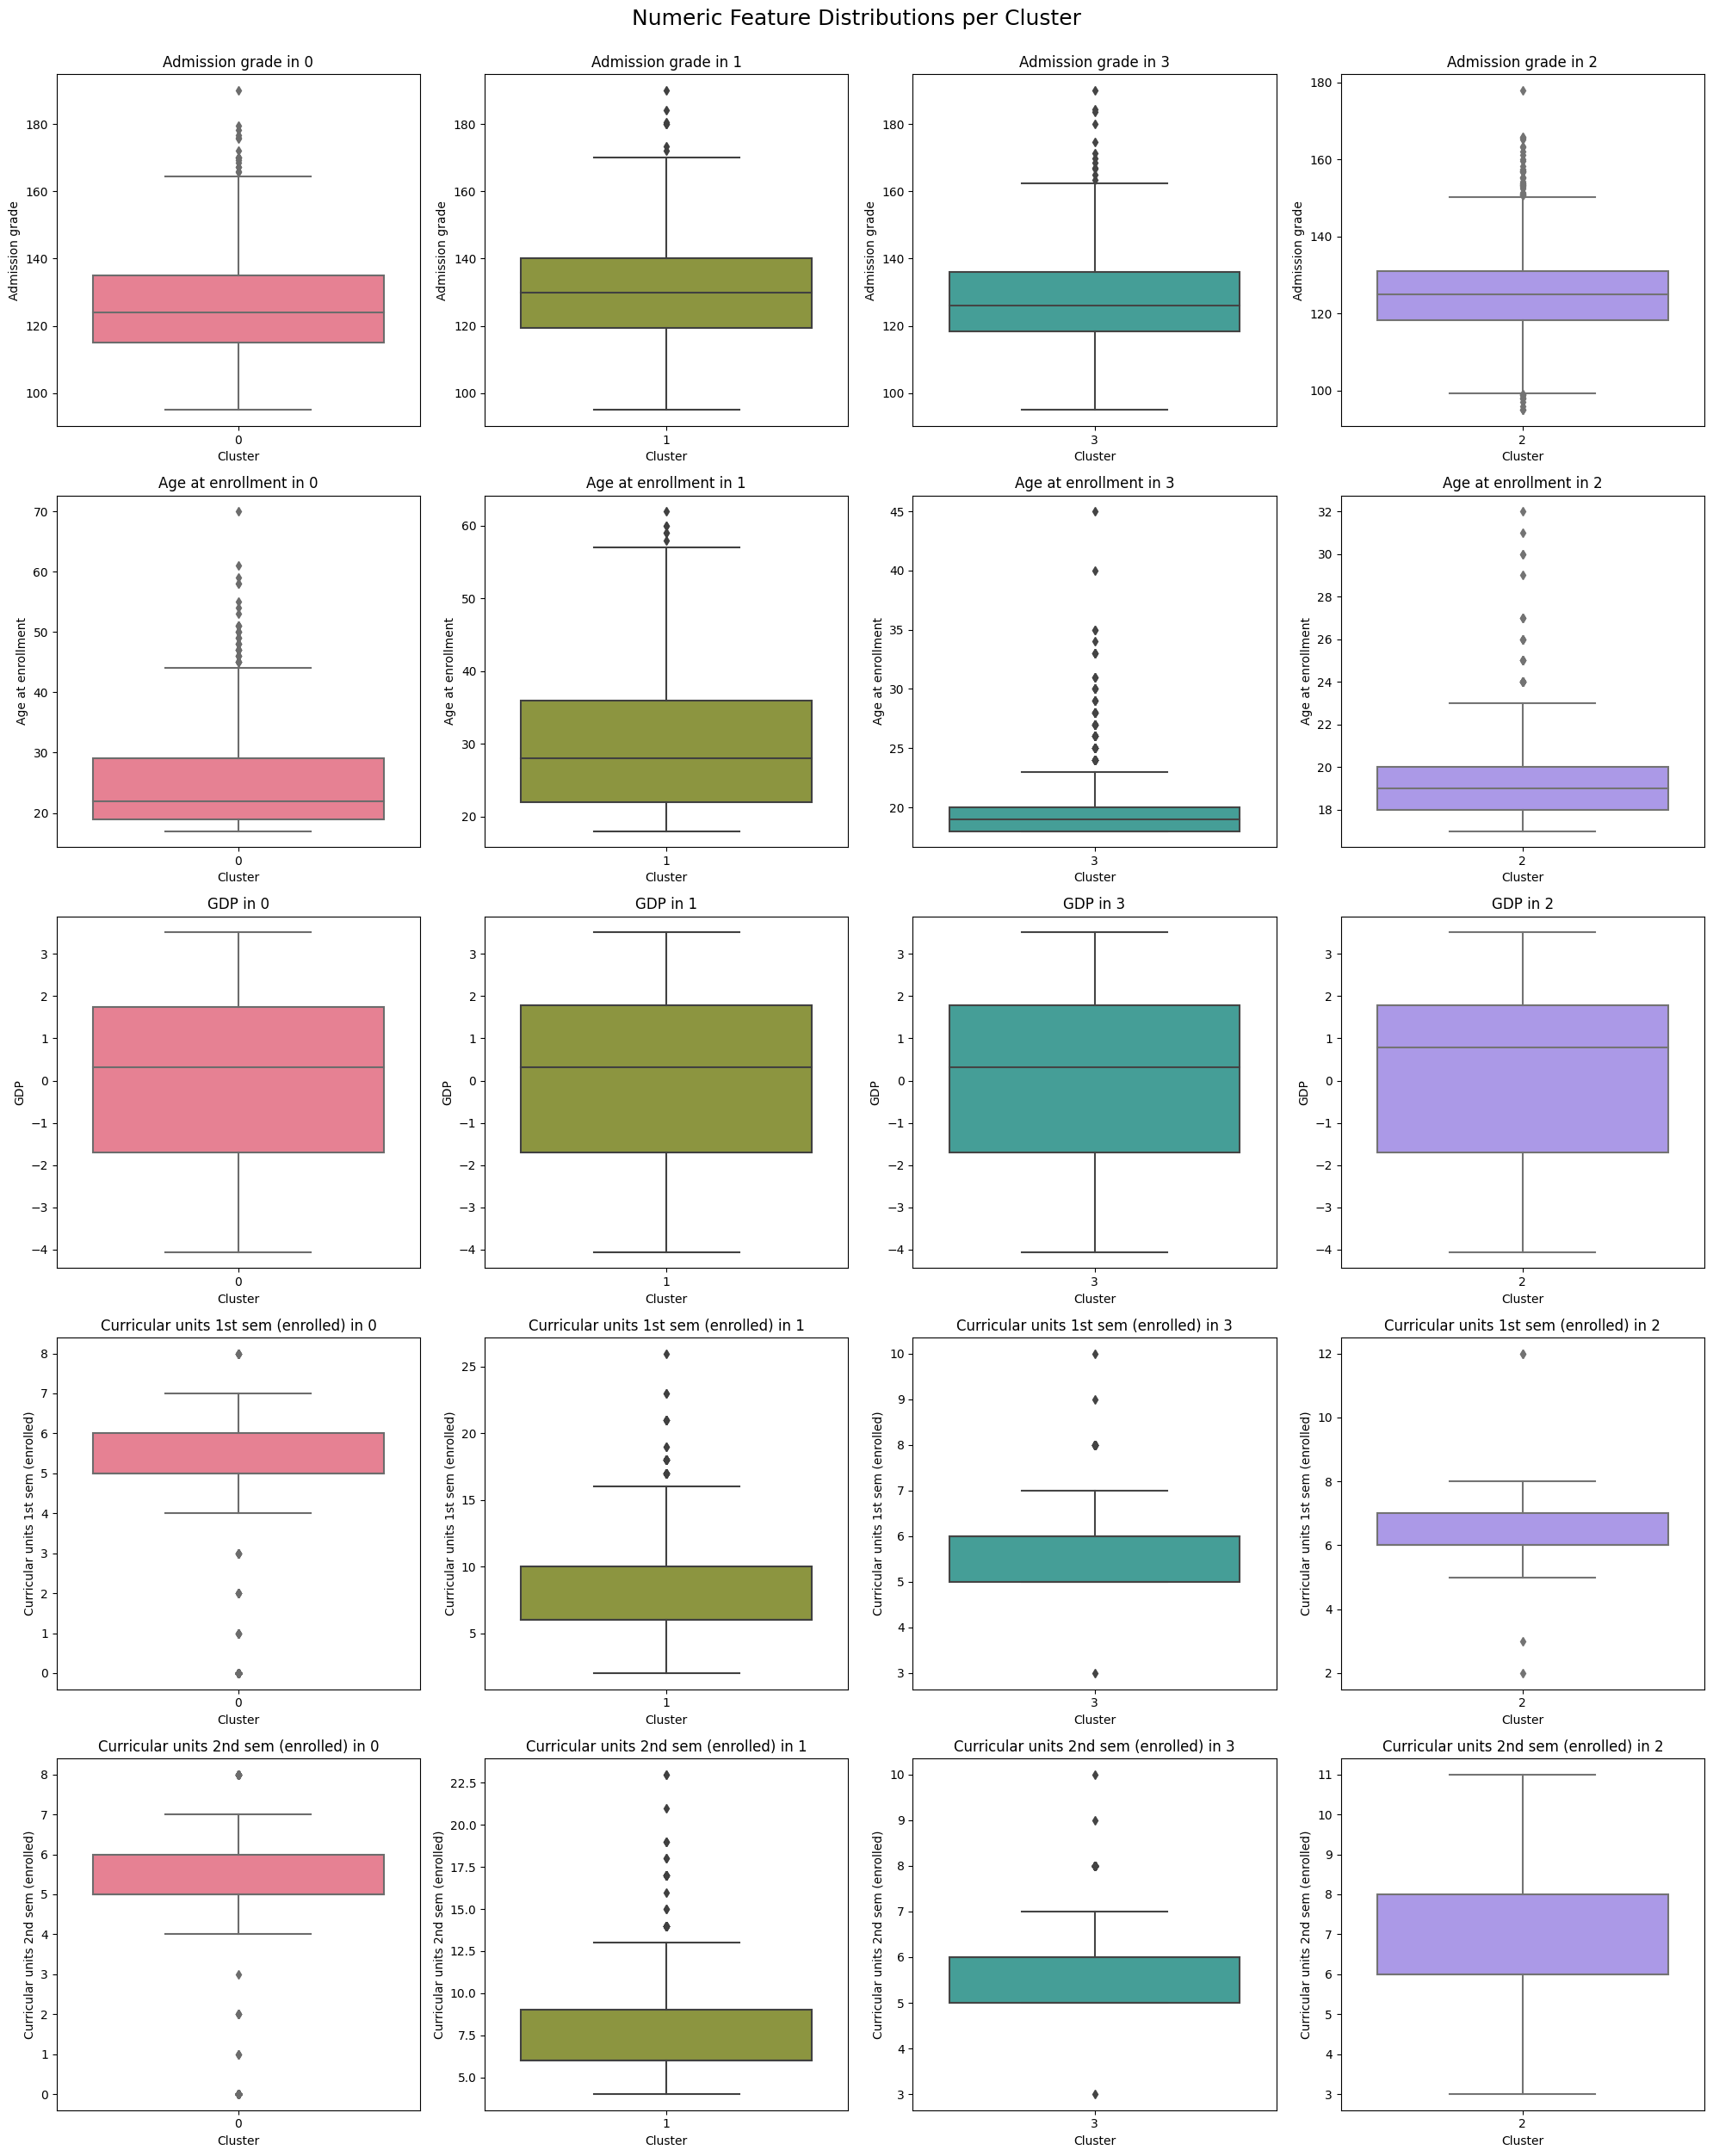

In [ ]:
from pyspark.sql.functions import col
import seaborn as sns

# Assuming numeric_columns is a list of numeric column names in your DataFrame
# Replace this with your actual list of numeric columns
numeric_columns = ['Admission grade', 'Age at enrollment', 'GDP', 'Curricular units 1st sem (enrolled)', 'Curricular units 2nd sem (enrolled)']

# Get unique clusters
clusters = model_df.select("kmeans_feat").distinct().rdd.flatMap(lambda x: x).collect()

# Define a color palette for the clusters
cluster_colors = sns.color_palette("husl", n_colors=len(clusters))

# Filter numeric columns
numeric_model_df = model_df.select(['kmeans_feat'] + numeric_columns)

# Set up the subplot matrix
ncols = len(clusters)
nrows = len(numeric_columns)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

# Loop through each feature
for i, feature in enumerate(numeric_columns):
    for j, cluster in enumerate(clusters):
        # Filter DataFrame for the specific cluster
        subset_df = numeric_model_df.filter(col("kmeans_feat") == cluster)

        # Plot boxplots for each kmeans cluster
        sns.boxplot(x="kmeans_feat", y=feature, data=subset_df.toPandas(), ax=axes[i, j], palette=[cluster_colors[j]])
        axes[i, j].set_title(f'{feature} in {cluster}')
        axes[i, j].set_xlabel('Cluster')
        axes[i, j].set_ylabel(feature)

fig.suptitle('Numeric Feature Distributions per Cluster', fontsize=18, y=1)
plt.tight_layout()
plt.show()

In [ ]:
model_df.columns

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-235-3a7c87363829>:29: UserWarning:

FixedFormatter should only be used to

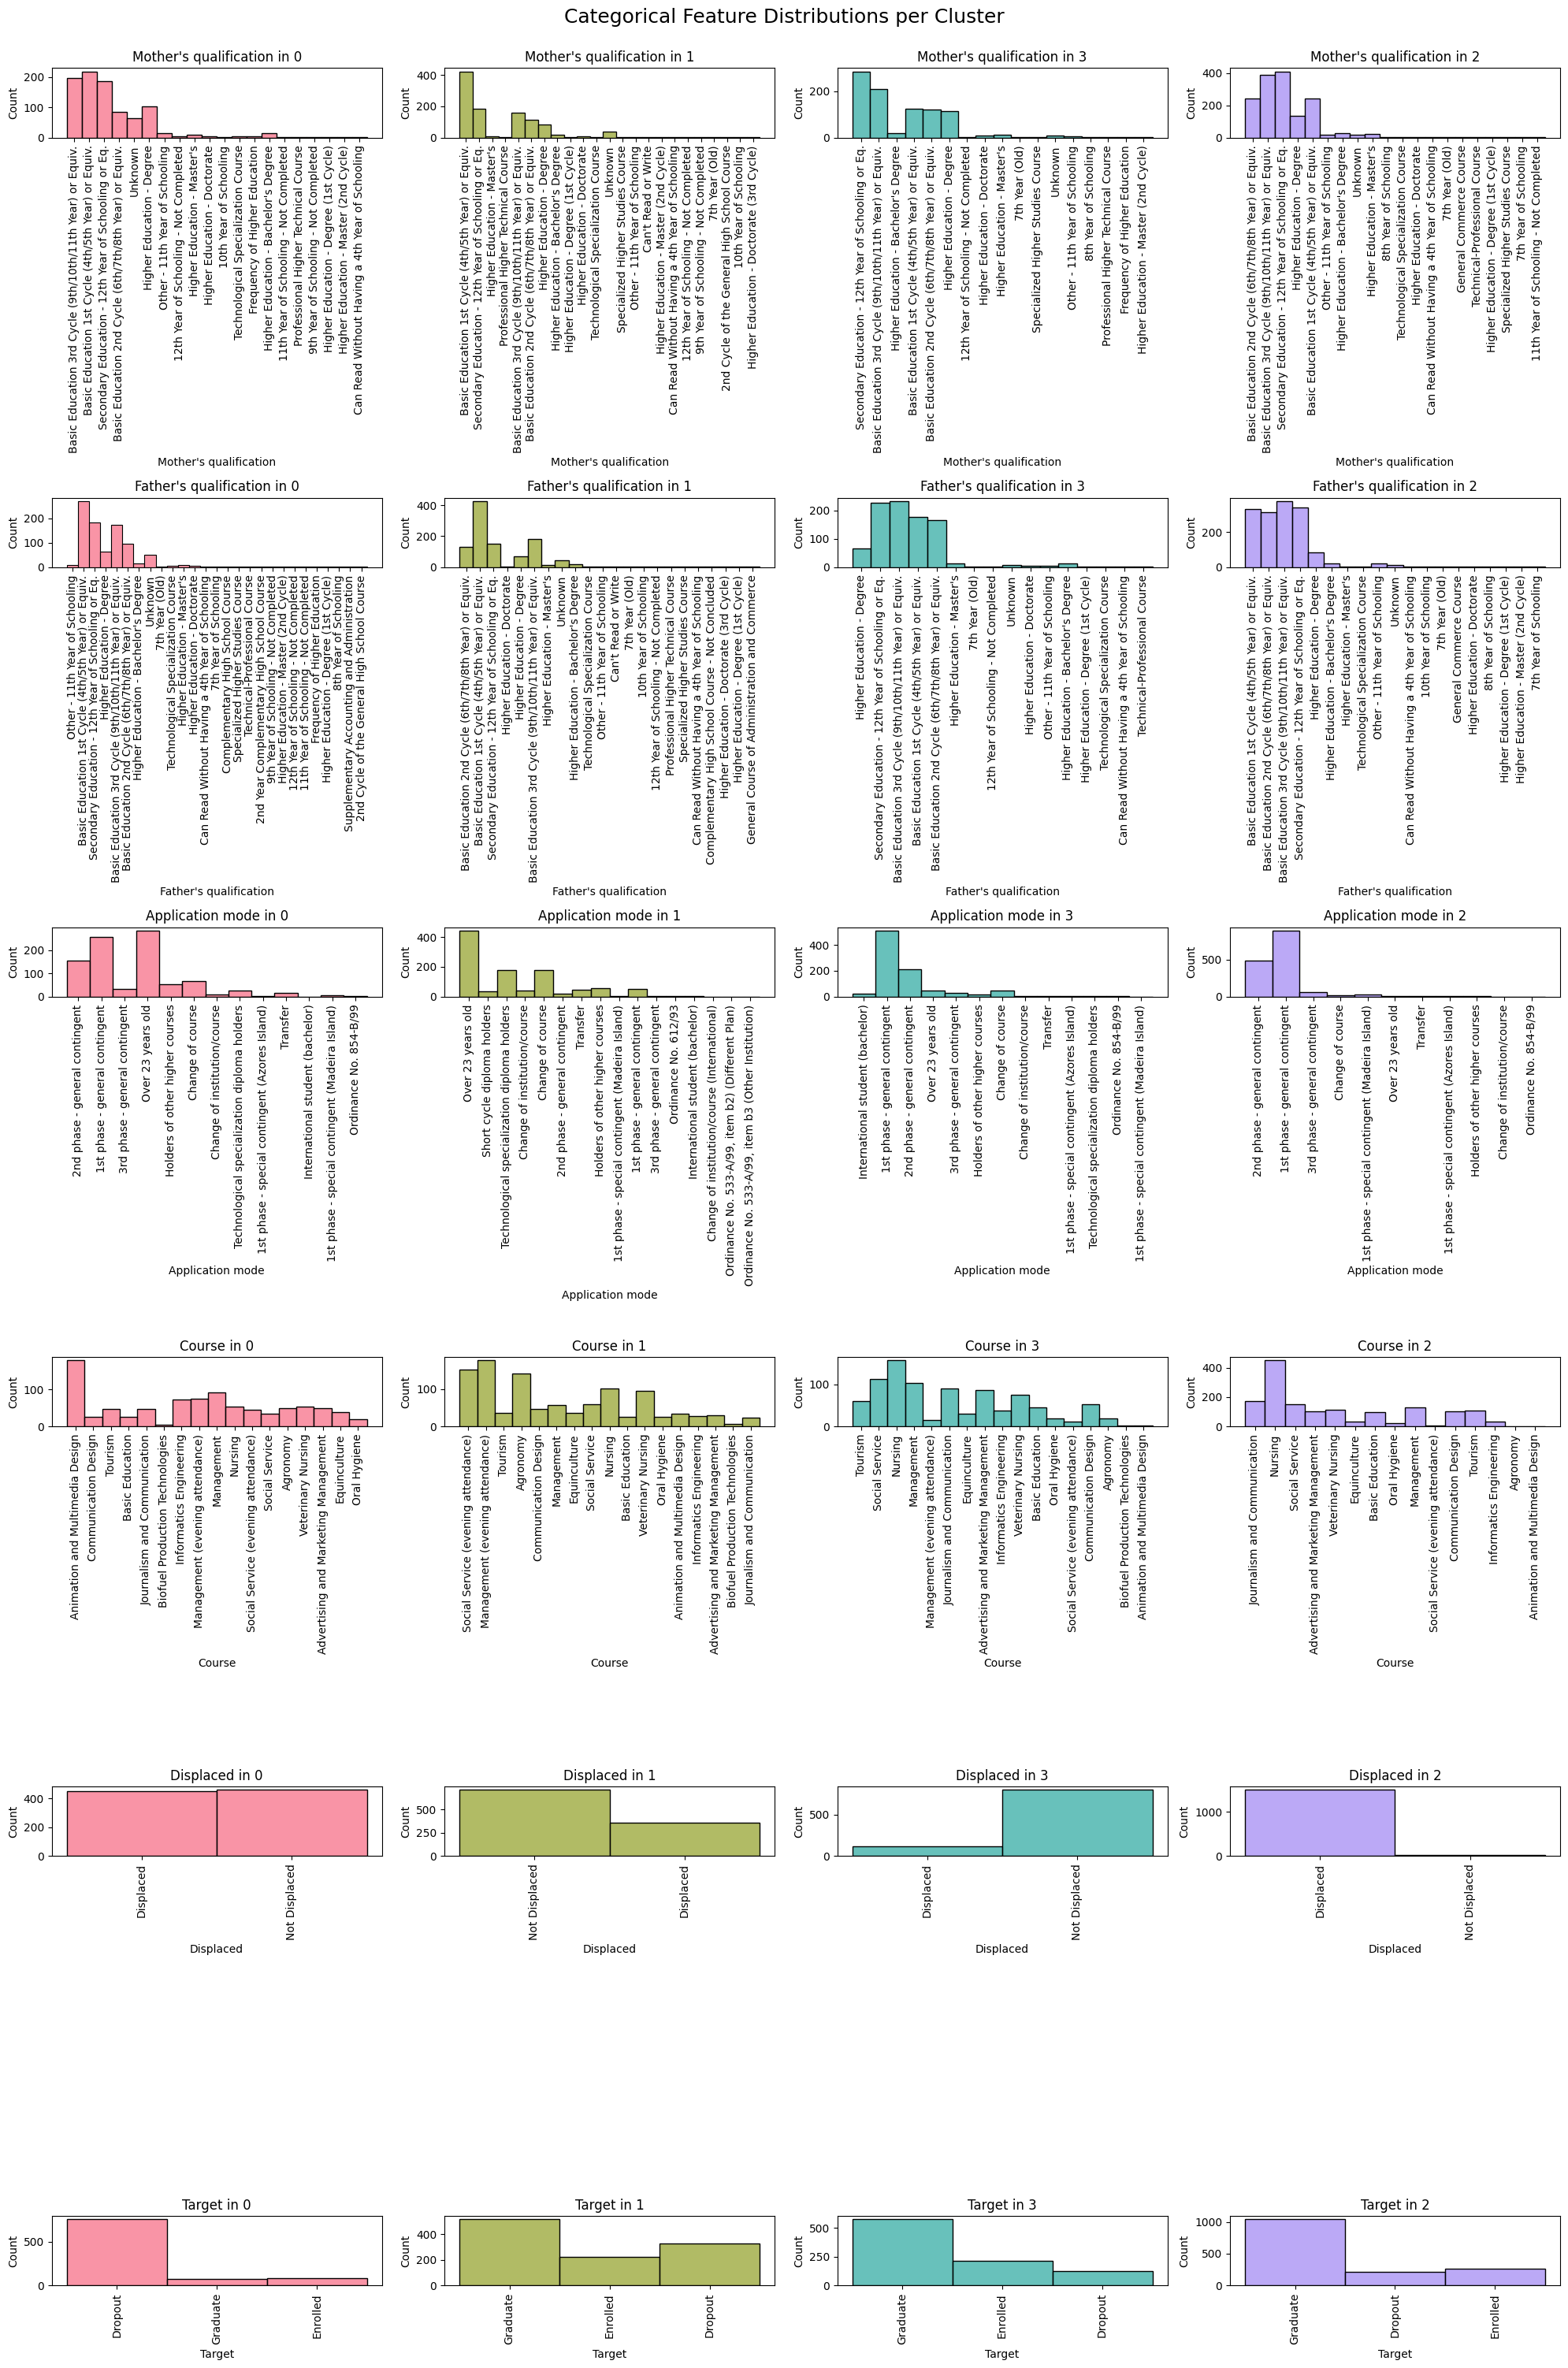

In [ ]:
# Replace this with your actual list of categorical columns
categorical_columns = ["Mother's qualification", "Father's qualification", 'Application mode', 'Course', 'Displaced', 'Target']

# Get unique clusters
clusters = model_df.select("kmeans_feat").distinct().rdd.flatMap(lambda x: x).collect()

# Define a color palette for the clusters
cluster_colors = sns.color_palette("husl", n_colors=len(clusters))

# Filter categorical columns
categorical_model_df = model_df.select(['kmeans_feat'] + categorical_columns)

# Set up the subplot matrix
ncols = len(clusters)
nrows = len(categorical_columns)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 5 * nrows))

# Loop through each feature
for i, feature in enumerate(categorical_columns):
    for j, cluster in enumerate(clusters):
        # Filter DataFrame for the specific cluster
        subset_df = categorical_model_df.filter(col("kmeans_feat") == cluster)

        # Plot histograms for each kmeans cluster
        sns.histplot(subset_df.toPandas(), x=feature, ax=axes[i, j], color=cluster_colors[j], discrete=True)
        axes[i, j].set_title(f'{feature} in {cluster}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Count')
        axes[i, j].set_xticklabels(axes[i, j].get_xticklabels(), rotation=90)  # Tilt labels by 90 degrees

fig.suptitle('Categorical Feature Distributions per Cluster', fontsize=18, y=1)
plt.tight_layout()
plt.show()

#Margarita - Exploratory Analysis and Logistic Regression

In [ ]:
## Exploratory Analysis

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=daeed2d7784a966329c8170d4dd132417693c326217272b2e925ffdc52bd92d3
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
import pyspark
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()

# Define the path to your CSV file
file_path = 'data.csv'

# Read the CSV file with a semicolon delimiter
df = spark.read.csv(file_path, header=True, sep=';')

# Show the first 20 rows of the DataFrame
df.show(20)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previou

In [ ]:
# Get the list of column names
column_names = df.columns

# Print the column names
for column_name in column_names:
    print(column_name)

Marital status
Application mode
Application order
Course
Daytime/evening attendance	
Previous qualification
Previous qualification (grade)
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Admission grade
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target


In [ ]:
import pandas as pd

In [ ]:
print('Data overview')
df.printSchema()
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Data overview
root
 |-- Marital status: string (nullable = true)
 |-- Application mode: string (nullable = true)
 |-- Application order: string (nullable = true)
 |-- Course: string (nullable = true)
 |-- Daytime/evening attendance\t: string (nullable = true)
 |-- Previous qualification: string (nullable = true)
 |-- Previous qualification (grade): string (nullable = true)
 |-- Nacionality: string (nullable = true)
 |-- Mother's qualification: string (nullable = true)
 |-- Father's qualification: string (nullable = true)
 |-- Mother's occupation: string (nullable = true)
 |-- Father's occupation: string (nullable = true)
 |-- Admission grade: string (nullable = true)
 |-- Displaced: string (nullable = true)
 |-- Educational special needs: string (nullable = true)
 |-- Debtor: string (nullable = true)
 |-- Tuition fees up to date: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Scholarship holder: string (nullable = true)
 |-- Age at enrollment: string (nullable = tr

Column Name Data type
0                                   Marital status    string
1                                 Application mode    string
2                                Application order    string
3                                           Course    string
4                     Daytime/evening attendance\t    string
5                           Previous qualification    string
6                   Previous qualification (grade)    string
7                                      Nacionality    string
8                           Mother's qualification    string
9                           Father's qualification    string
10                             Mother's occupation    string
11                             Father's occupation    string
12                                 Admission grade    string
13                                       Displaced    string
14                       Educational special needs    string
15                                          Debtor    string
16                         Tuition fees up to date    string
17                                          Gender    string
18                              Scholarship holder    string
19                               Age at enrollment    string
20                                   International    string
21             Curricular units 1st sem (credited)    string
22             Curricular units 1st sem (enrolled)    string
23          Curricular units 1st sem (evaluations)    string
24             Curricular units 1st sem (approved)    string
25                Curricular units 1st sem (grade)    string
26  Curricular units 1st sem (without evaluations)    string
27             Curricular units 2nd sem (credited)    string
28             Curricular units 2nd sem (enrolled)    string
29          Curricular units 2nd sem (evaluations)    string
30             Curricular units 2nd sem (approved)    string
31                Curricular units 2nd sem (grade)    string
32  Curricular units 2nd sem (without evaluations)    string
33                               Unemployment rate    string
34                                  Inflation rate    string
35                                             GDP    string
36                                          Target    string

In [ ]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):
There are total 4424 row, Let print first 2 data rows:


Marital status Application mode Application order Course  \
0              1               17                 5    171   
1              1               15                 1   9254   

  Daytime/evening attendance\t Previous qualification  \
0                            1                      1   
1                            1                      1   

  Previous qualification (grade) Nacionality Mother's qualification  \
0                          122.0           1                     19   
1                          160.0           1                      1   

  Father's qualification  ... Curricular units 2nd sem (credited)  \
0                     12  ...                                   0   
1                      3  ...                                   0   

  Curricular units 2nd sem (enrolled) Curricular units 2nd sem (evaluations)  \
0                                   0                                      0   
1                                   6                                      6   

  Curricular units 2nd sem (approved) Curricular units 2nd sem (grade)  \
0                                   0                              0.0   
1                                   6               13.666666666666666   

  Curricular units 2nd sem (without evaluations) Unemployment rate  \
0                                              0              10.8   
1                                              0              13.9   

  Inflation rate   GDP    Target  
0            1.4  1.74   Dropout  
1           -0.3  0.79  Graduate  

[2 rows x 37 columns]

In [ ]:
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


Column Name Data type
0                                   Marital status    string
1                                 Application mode    string
2                                Application order    string
3                                           Course    string
4                     Daytime/evening attendance\t    string
5                           Previous qualification    string
6                   Previous qualification (grade)    string
7                                      Nacionality    string
8                           Mother's qualification    string
9                           Father's qualification    string
10                             Mother's occupation    string
11                             Father's occupation    string
12                                 Admission grade    string
13                                       Displaced    string
14                       Educational special needs    string
15                                          Debtor    string
16                         Tuition fees up to date    string
17                                          Gender    string
18                              Scholarship holder    string
19                               Age at enrollment    string
20                                   International    string
21             Curricular units 1st sem (credited)    string
22             Curricular units 1st sem (enrolled)    string
23          Curricular units 1st sem (evaluations)    string
24             Curricular units 1st sem (approved)    string
25                Curricular units 1st sem (grade)    string
26  Curricular units 1st sem (without evaluations)    string
27             Curricular units 2nd sem (credited)    string
28             Curricular units 2nd sem (enrolled)    string
29          Curricular units 2nd sem (evaluations)    string
30             Curricular units 2nd sem (approved)    string
31                Curricular units 2nd sem (grade)    string
32  Curricular units 2nd sem (without evaluations)    string
33                               Unemployment rate    string
34                                  Inflation rate    string
35                                             GDP    string
36                                          Target    string

In [ ]:
# Let quick overview Admission Grades by gender
Admission_by_gender = df.groupBy('Admission grade', 'Gender').count().toPandas()
Admission_by_gender[:5]

Admission grade Gender  count
0           129.3      0     13
1           145.3      0      3
2           112.8      0      2
3           122.9      0      3
4           139.8      0      6

In [ ]:
# Use the describe method to generate summary statistics for numerical columns
summary = df.describe()

# Show the summary statistics
summary.show()

+-------+------------------+------------------+------------------+-----------------+----------------------------+----------------------+------------------------------+------------------+----------------------+----------------------+-------------------+-------------------+------------------+-------------------+-------------------------+-------------------+-----------------------+-------------------+-------------------+------------------+--------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+------------------+------------------+--------------------+--------+
|summary|    Mar

In [ ]:
# Group and count
gender_count = df.groupBy("gender").count()
gender_count.show()
#1 – male 0 – female

+------+-----+
|gender|count|
+------+-----+
|     0| 2868|
|     1| 1556|
+------+-----+



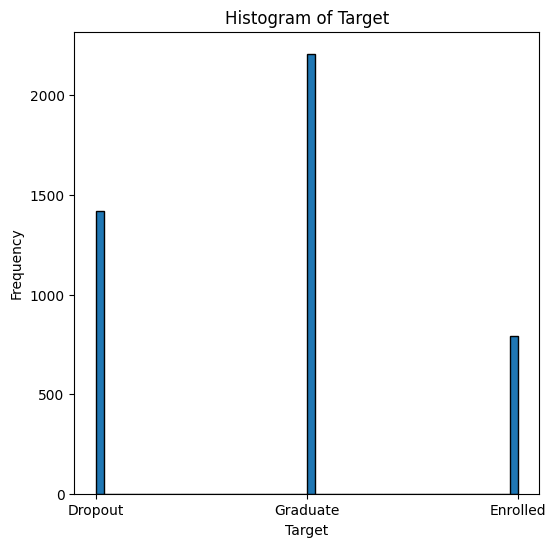

In [ ]:
#from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Create a Spark session
#spark = SparkSession.builder.appName("HistogramExample").getOrCreate()

# Assuming 'df' is your PySpark DataFrame
# Select the column you want to create a histogram for
column_name = "Target"

# Collect the column data as a list
column_data = df.select(column_name).rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.figure(figsize=(6, 6))
plt.hist(column_data, bins=50, edgecolor='k')
plt.xlabel(column_name)
plt.ylabel("Frequency")
plt.title(f"Histogram of {column_name}")
plt.grid(False)
plt.show()

In [ ]:
#Let's show the distribution of Nacionality

# Show the distribution of the "Nacionality" column
Nacionality_distribution = df.groupBy("Nacionality").count()
Nacionality_distribution.show()

+-----------+-----+
|Nacionality|count|
+-----------+-----+
|        101|    2|
|         11|    3|
|         22|   13|
|        100|    3|
|         17|    1|
|         26|   14|
|          6|   13|
|         41|   38|
|        103|    3|
|         25|    2|
|        108|    1|
|         24|    5|
|         32|    1|
|          1| 4314|
|        105|    2|
|         62|    2|
|        109|    1|
|         13|    1|
|         21|    2|
|         14|    1|
+-----------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as fn
df.select(fn.corr('Age at enrollment', 'Scholarship holder')).show()
df.select(fn.corr('Debtor', 'Scholarship holder')).show()
df.select(fn.corr('Debtor', 'Inflation rate')).show()
df.select(fn.corr('GDP', 'Tuition fees up to date')).show()

+-------------------------------------------+
|corr(Age at enrollment, Scholarship holder)|
+-------------------------------------------+
|                       -0.18991694305420687|
+-------------------------------------------+

+--------------------------------+
|corr(Debtor, Scholarship holder)|
+--------------------------------+
|            -0.06748940007494854|
+--------------------------------+

+----------------------------+
|corr(Debtor, Inflation rate)|
+----------------------------+
|        -0.02188817244933...|
+----------------------------+

+----------------------------------+
|corr(GDP, Tuition fees up to date)|
+----------------------------------+
|              -0.00276793955066...|
+----------------------------------+



In [ ]:
# Assuming 'df' is your Pandas DataFrame
correlation_matrix = df.corr()

# Show the correlation matrix
print(correlation_matrix)


                                                Marital status  \
Marital status                                        1.000000   
Application mode                                      0.264006   
Application order                                    -0.125854   
Course                                                0.046365   
Daytime/evening attendance\t                         -0.274939   
Previous qualification                                0.062529   
Previous qualification (grade)                       -0.022406   
Nacionality                                          -0.008843   
Mother's qualification                                0.193163   
Father's qualification                                0.130353   
Mother's occupation                                   0.034994   
Father's occupation                                   0.031609   
Admission grade                                      -0.004771   
Displaced                                            -0.234886   
Educationa

<ipython-input-45-0e286b8114b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
import pandas as pd

# Read the data into a DataFrame
df = pd.read_csv('data.csv')

# Check the column names in the DataFrame
print(df.columns)

Index(['Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'], dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Check if the columns exist in the DataFrame
required_columns = ['Marital status', 'Nationality']
if not all(col in df.columns for col in required_columns):
    print("Error: One or more required columns do not exist in the DataFrame.")
else:
    # Create a contingency table
    contingency_table = pd.crosstab(df['Marital status'], df['Nationality'])

    # Perform the Chi-Square test
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Display the results
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")

    # Interpret the results
    if p < 0.05:
        print("There is a significant association between marital status and nationality.")
    else:
        print("There is no significant association between marital status and nationality.")


Error: One or more required columns do not exist in the DataFrame.


In [ ]:
# Display the column names in the DataFrame
print(df.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
# Example: Accessing columns with special characters using backticks
df["Mother's qualification"]
df["Father's qualification"]


0       12
1        3
2       37
3       37
4       38
        ..
4419     1
4420     1
4421    37
4422    37
4423    37
Name: Father's qualification, Length: 4424, dtype: int64

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Marital status'], df["Nacionality"])

# Perform the Chi-Square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

# Interpret the results
if p < 0.05:
    print("There is a significant association between marital status and nationality.")
else:
    print("There is no significant association between marital status and nationality.")


Chi-Square Statistic: 27.73155284744871
P-Value: 0.9999999999999464
There is no significant association between marital status and nationality.


In [ ]:
# Print the column names of your DataFrame
print(df.columns)


Index(['Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'], dtype='object')


In [ ]:
import pandas as pd

# Assuming your file is named 'your_data.csv', adjust the filename accordingly
filename = 'data.csv'

# Specify the delimiter as semicolon and read the data
df = pd.read_csv(filename, delimiter=';')

# Display the first few rows to check the structure
print(df.head())


   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [ ]:
# Convert the "Scholarship holder" column to integer
df["Scholarship holder"] = df["Scholarship holder"].astype(int)

# Calculate the total number of scholarships for each gender
total_scholarships = df.groupby("Gender")["Scholarship holder"].sum()

# Display the result
print(total_scholarships)


Gender
0    867
1    232
Name: Scholarship holder, dtype: int64


In [ ]:
# Assuming 'df' is your Pandas DataFrame with 'Scholarship holder' column
# Convert the "Scholarship holder" column to integer
df["Scholarship holder"] = df["Scholarship holder"].astype(int)

# Calculate the total number of scholarships for each gender
total_scholarships = df.groupby("Gender")["Scholarship holder"].sum()

# Display the result
print(total_scholarships)


Gender
0    867
1    232
Name: Scholarship holder, dtype: int64


In [ ]:
# Assuming 'df' is your Pandas DataFrame with 'Scholarship holder' column
# Convert the "Scholarship holder" column to integer
df["Scholarship holder"] = df["Scholarship holder"].astype(int)

# Calculate the total number of scholarships for each gender
result = df.groupby('Gender').agg({'Scholarship holder': 'sum'}).rename(columns={'Scholarship holder': 'total_scholarships'}).reset_index()

# Display the result
print(result)


   Gender  total_scholarships
0       0                 867
1       1                 232


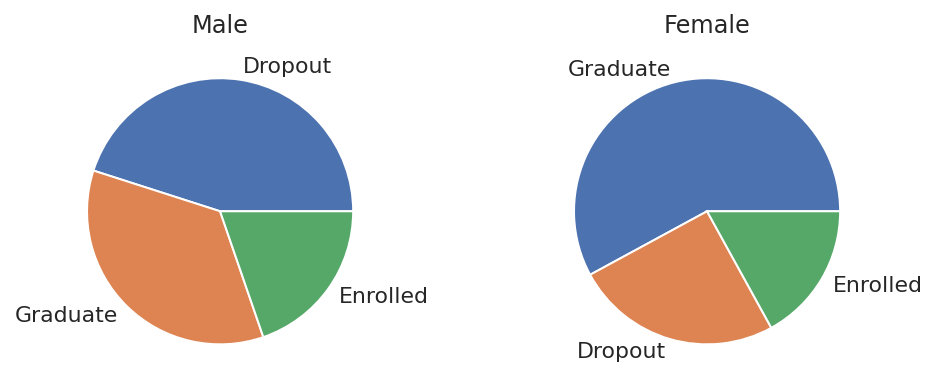

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig = plt.figure(figsize=(8, 3), dpi=144)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Filter the data based on gender
male_data = df[df['Gender'] == 1]
female_data = df[df['Gender'] == 0]

# Plot a pie chart for males
cts_male = male_data['Target'].value_counts().to_frame()
ax1.pie(cts_male['Target'], labels=cts_male.index)
ax1.set_title('Male')

# Plot a pie chart for females
cts_female = female_data['Target'].value_counts().to_frame()
ax2.pie(cts_female['Target'], labels=cts_female.index)
ax2.set_title('Female')

plt.show()

In [ ]:
# Portugese

df[df['Nacionality'] == 1].groupby('Target')['Target'].count()/len(df[df['Nacionality'] == 1])

Target
Dropout     0.321975
Enrolled    0.178489
Graduate    0.499536
Name: Target, dtype: float64

In [ ]:
# Non - portugese

df[df['Nacionality'] != 1].groupby('Target')['Target'].count()/len(df[df['Nacionality'] != 1])

Target
Dropout     0.290909
Enrolled    0.218182
Graduate    0.490909
Name: Target, dtype: float64

Text(0.5, 1.0, 'Non - Portugese')

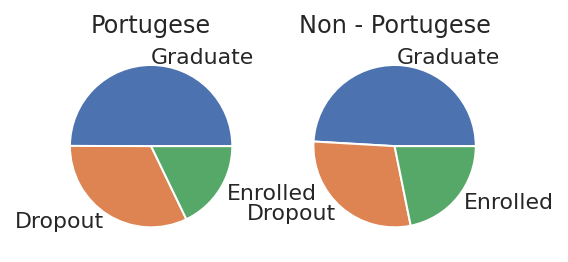

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(4,3),dpi=144)
ax = fig.add_subplot(121)

cts = df[df['Nacionality'] == 1].Target.value_counts().to_frame()
ax.pie(cts.Target, labels=cts.index)
ax.set_title("Portugese")

ax = fig.add_subplot(122)
cts = df[df['Nacionality'] != 1].Target.value_counts().to_frame()
ax.pie(cts.Target, labels=cts.index)
ax.set_title("Non - Portugese")

In [ ]:
## Logistic Regression ##

In [ ]:

df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

# Get the list of column names
column_names = df.columns

# Extract all column names except the last one
column_features = column_names[:-1]

column_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))

In [ ]:
df.show(5)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previous 

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

In [ ]:
selected_features = ['Marital status',
                     'Application mode',
                     'Application order',
                     'Course',
                     'Daytime/evening attendance\t',
                     'Previous qualification',
                     'Previous qualification (grade)',
                     'Nacionality',
                     "Mother's qualification",
                     "Father's qualification",
                     "Mother's occupation",
                     "Father's occupation",
                     'Admission grade',
                     'Displaced',
                     'Educational special needs',
                     'Debtor',
                     'Tuition fees up to date',
                     'Gender',
                     'Scholarship holder',
                     'Age at enrollment',
                     'International',
                     'Curricular units 1st sem (credited)',
                     'Curricular units 1st sem (enrolled)',
                     'Curricular units 1st sem (evaluations)',
                     'Curricular units 1st sem (approved)',
                     'Curricular units 1st sem (grade)',
                     'Curricular units 1st sem (without evaluations)',
                     'Curricular units 2nd sem (credited)',
                     'Curricular units 2nd sem (enrolled)',
                     'Curricular units 2nd sem (evaluations)',
                     'Curricular units 2nd sem (approved)',
                     'Curricular units 2nd sem (grade)',
                     'Curricular units 2nd sem (without evaluations)',
                     'Unemployment rate',
                     'Inflation rate',
                     'GDP']
df = df.select(selected_features + ['Target'])


In [ ]:
df.show(5)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previous 

In [ ]:
df.printSchema()

root
 |-- Marital status: long (nullable = true)
 |-- Application mode: long (nullable = true)
 |-- Application order: long (nullable = true)
 |-- Course: long (nullable = true)
 |-- Daytime/evening attendance\t: long (nullable = true)
 |-- Previous qualification: long (nullable = true)
 |-- Previous qualification (grade): double (nullable = true)
 |-- Nacionality: long (nullable = true)
 |-- Mother's qualification: long (nullable = true)
 |-- Father's qualification: long (nullable = true)
 |-- Mother's occupation: long (nullable = true)
 |-- Father's occupation: long (nullable = true)
 |-- Admission grade: double (nullable = true)
 |-- Displaced: long (nullable = true)
 |-- Educational special needs: long (nullable = true)
 |-- Debtor: long (nullable = true)
 |-- Tuition fees up to date: long (nullable = true)
 |-- Gender: long (nullable = true)
 |-- Scholarship holder: long (nullable = true)
 |-- Age at enrollment: long (nullable = true)
 |-- International: long (nullable = true)
 |-

In [ ]:
#df.show(5)

In [ ]:
#df.columns

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline

# Assuming 'df' is your DataFrame
categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t',
                        'Previous qualification', 'Nacionality', "Mother's qualification",
                        "Father's qualification", "Mother's occupation", "Father's occupation",
                        'Displaced', 'Educational special needs', 'Tuition fees up to date',
                        'Debtor', 'Gender', 'Scholarship holder', 'International',
                        'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                        'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                        'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)',
                        'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)',
                        'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)'
                        ]

numeric_features = ['Previous qualification (grade)', 'Admission grade', 'Age at enrollment',
                    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
                    'Unemployment rate', 'Inflation rate', 'GDP']

indexers = [StringIndexer(inputCol=col, outputCol=col + '_index', handleInvalid='keep') for col in categorical_features]
encoder = [OneHotEncoder(inputCol=col + '_index', outputCol=col + '_encoded') for col in categorical_features]

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=[col + '_encoded' for col in categorical_features] + numeric_features,
                            outputCol='features')

# Create a pipeline to execute the transformations
pipeline = Pipeline(stages=indexers + encoder + [assembler])

# Fit and transform the DataFrame
#df_transformed = pipeline.fit(df).transform(df)

# Select only relevant columns (features and label) for logistic regression
#selected_columns = ['features', 'Target']
#df_transformed = df_transformed.select(selected_columns)


In [ ]:
#df_transformed.show(10)

In [ ]:
from pyspark.ml.classification import LogisticRegression
# initialize the logistic regression model
log_reg = LogisticRegression(featuresCol = 'features',
                             labelCol = 'Target')

In [ ]:
# Split the data into train and test sets
training, testing = df.randomSplit([0.7, 0.3], seed=123)


In [ ]:
# set up the pipeline
log_reg_pipe = Pipeline(stages=indexers + encoder + [assembler, log_reg])

In [ ]:
# Fit and evaluate lr_pipe
lr_model = log_reg_pipe.fit(training)

In [ ]:
# Make predictions on the test data
predictions = lr_model.transform(testing)
predictions.show(5)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+------+--------------------+----------------------+------------+----------------------------------+----------------------------

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol = 'rawPrediction',
                                          labelCol = 'Target')

roc_auc_log_reg = evaluator.evaluate(predictions)

print(f'Area Under ROC Curve for Logistic Regression: {roc_auc_log_reg:.3f}')

Area Under ROC Curve for Logistic Regression: 0.885


In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="Target")
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8845092660310662


In [ ]:
# Print the test AUC score
#print(f"Test AUC score: {test_auc * 100:.1f}%")

In [ ]:
# Let's try a normalization step in our pipeline to see if it improves the AUC.
from pyspark.ml.feature import StandardScaler

# normalize the vectorized features
scaler = StandardScaler(inputCol = 'features',
                        outputCol = 'scaled_features',
                        withStd = True,
                        #withMean = False
                        withMean = True)

# initialize the new logistic regression model
log_reg_2 = LogisticRegression(featuresCol = 'scaled_features',
                             labelCol = 'Target')

# set up the new pipeline
log_reg_pipe_2 = Pipeline(stages=indexers + encoder + [assembler, log_reg])

# train the model
log_reg_model_2 = log_reg_pipe_2.fit(training)

# make predictions using our new model
predictions_2 = log_reg_model_2.transform(testing)

roc_auc_log_reg_2 = evaluator.evaluate(predictions_2)

#print(f'Area Under ROC Curve for Logistic Regression: {roc_auc_log_reg_2:.2f}')
print(f'Area Under ROC Curve for Logistic Regression: {roc_auc_log_reg_2}')

Area Under ROC Curve for Logistic Regression: 0.8845092660310674


In [ ]:
# It doesn't improve

In [ ]:
# Get the area under the ROC curve
roc_auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})
print(f"Area under ROC = {roc_auc:.3f}")


Area under ROC = 0.885


In [ ]:
# Get the area under the precision-recall curve
pr_auc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"})
print(f"Area under PR = {pr_auc}")

Area under PR = 0.7912578093652725


In [ ]:
# Create a confusion matrix
tp = predictions.filter("prediction = 1 AND Target = 1").count()
tn = predictions.filter("prediction = 0 AND Target = 0").count()
fp = predictions.filter("prediction = 1 AND Target = 0").count()
fn = predictions.filter("prediction = 0 AND Target = 1").count()

confusion_matrix = [[tn, fp], [fn, tp]]

# Display the confusion matrix
print("Confusion Matrix:")
for row in confusion_matrix:
    print(row)


Confusion Matrix:
[794, 93]
[102, 325]


In [ ]:
# Confusion matrix
tp = 325
tn = 794
fp = 93
fn = 102

# Calculate rates
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the rates
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall (Sensitivity): {recall:.3f}")
print(f"Specificity: {specificity:.3f}")
print(f"F1 Score: {f1_score:.3f}")


Accuracy: 0.852
Precision: 0.778
Recall (Sensitivity): 0.761
Specificity: 0.895
F1 Score: 0.769


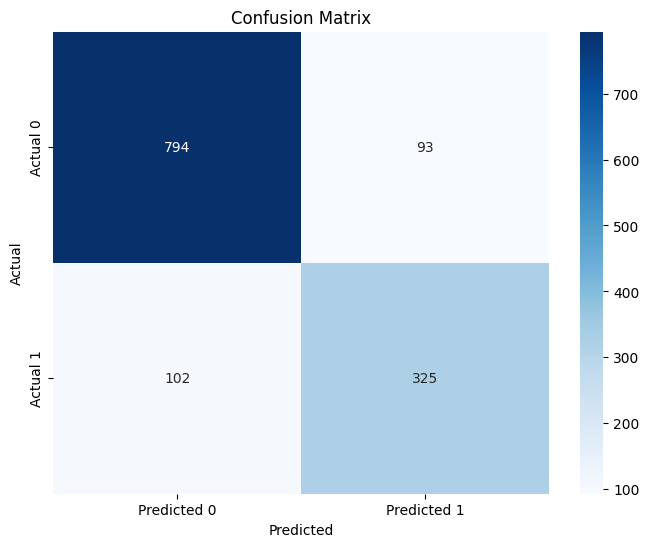

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Values of the confusion matrix
confusion_matrix = [[794, 93], [102, 325]]

# Convert to Pandas DataFrame
confusion_df = pd.DataFrame(confusion_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


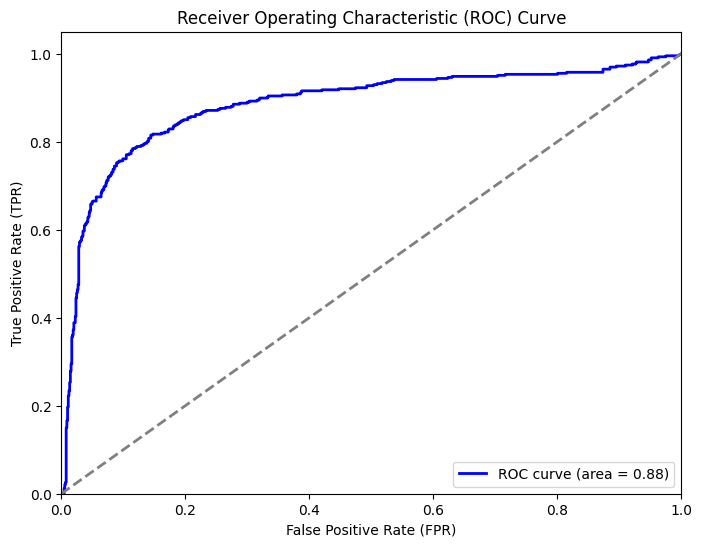

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd

# Assuming lr_model is your trained logistic regression model and testing_data is your testing DataFrame
predictions = lr_model.transform(testing).toPandas()
#predictions_df = pd.DataFrame(predictions)

# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, _ = roc_curve(predictions['Target'], predictions['probability'].apply(lambda x: x[1]))

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Feature Importance Analysis

In [ ]:
# Fit the pipeline
log_reg_model = log_reg_pipe.fit(training)

# Access the Logistic Regression model
lr_model = log_reg_model.stages[-1]

In [ ]:
import pandas as pd
pd.DataFrame(list(zip(df.columns[2:],
                      lr_model.coefficients.toArray())),
            columns = ['column', 'weight'])\
            .sort_values('weight')

column     weight
4                   Previous qualification (grade)  -4.427995
15                                          Gender  -1.976760
25             Curricular units 2nd sem (credited)  -1.560236
31                               Unemployment rate  -1.549926
34                                          Target  -1.261083
33                                             GDP  -1.203446
26             Curricular units 2nd sem (enrolled)  -1.187539
18                                   International  -1.165461
24  Curricular units 1st sem (without evaluations)  -1.004972
13                                          Debtor  -0.707810
2                     Daytime/evening attendance\t  -0.651934
28             Curricular units 2nd sem (approved)  -0.609158
30  Curricular units 2nd sem (without evaluations)  -0.597795
9                              Father's occupation  -0.392666
10                                 Admission grade  -0.334869
6                           Mother's qualification  -0.283668
27          Curricular units 2nd sem (evaluations)  -0.184344
1                                           Course  -0.082256
8                              Mother's occupation   0.094013
0                                Application order   0.151479
7                           Father's qualification   0.152825
3                           Previous qualification   0.197780
12                       Educational special needs   0.217352
16                              Scholarship holder   0.234534
19             Curricular units 1st sem (credited)   0.280819
23                Curricular units 1st sem (grade)   0.330238
29                Curricular units 2nd sem (grade)   0.510476
14                         Tuition fees up to date   0.931051
11                                       Displaced   0.954772
17                               Age at enrollment   1.487539
5                                      Nacionality   8.035204
32                                  Inflation rate   9.986935
22             Curricular units 1st sem (approved)  13.598689
20             Curricular units 1st sem (enrolled)  23.746879
21          Curricular units 1st sem (evaluations)  43.399290

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


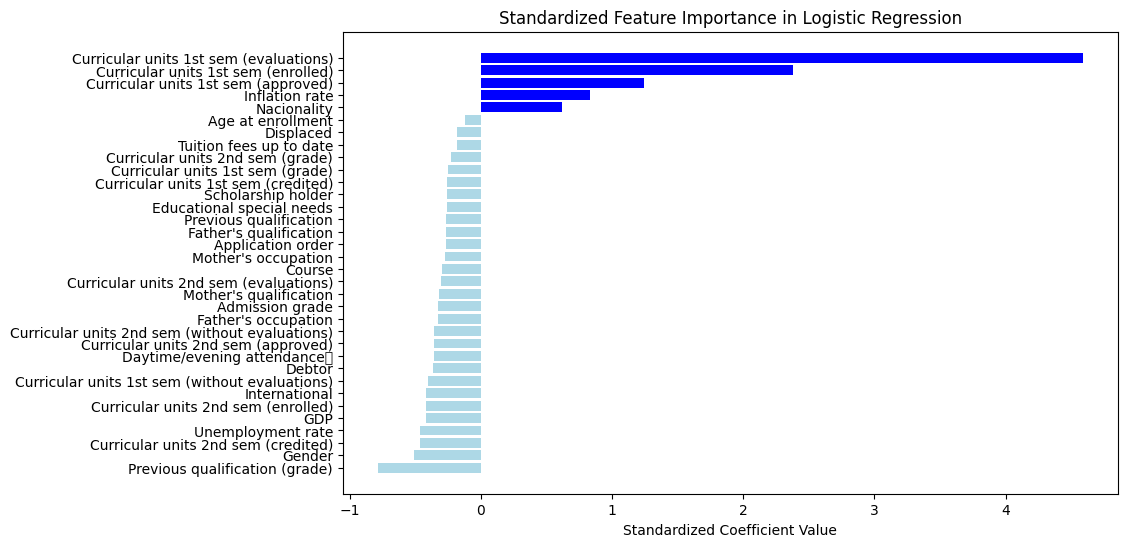

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and lr_model is your Logistic Regression model
coefficients_df = pd.DataFrame(list(zip(df.columns[2:-1],  # Exclude the last column (target)
                                        lr_model.coefficients.toArray())),
                                columns=['column', 'weight'])\
                    .sort_values('weight')

# Standardize the coefficients
coefficients_df['weight'] = (coefficients_df['weight'] - coefficients_df['weight'].mean()) / coefficients_df['weight'].std()

# Plotting code
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['column'], coefficients_df['weight'], color=['blue' if w > 0 else 'lightblue' for w in coefficients_df['weight']])
plt.xlabel('Standardized Coefficient Value')
plt.title('Standardized Feature Importance in Logistic Regression')
plt.show()


# Gughapriyaa Elango - Classification with DT RF Ensemble

In [ ]:
# install PySpark
! pip install pyspark >& /dev/null

In [ ]:
# create Spark Session and Spark Context, import
from pyspark.sql import SparkSession
from pyspark.sql import functions as f, Row
from pyspark.ml import feature, clustering, Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName('Nina_Margarita_Indra_Priya').getOrCreate()

In [ ]:
# create Spark Session and Spark Context, import
from pyspark.sql import SparkSession
from pyspark.sql import functions as f, Row
from pyspark.ml import feature, clustering, Pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
spark = SparkSession.builder.appName('Nina_Margarita_Indra_Priya').getOrCreate()

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

# Get the list of column names
column_names = df.columns

column_features = column_names[:-1]

column_features

['Marital status',
 'Application mode',
 'Application order',
 'Course',
 'Daytime/evening attendance\t',
 'Previous qualification',
 'Previous qualification (grade)',
 'Nacionality',
 "Mother's qualification",
 "Father's qualification",
 "Mother's occupation",
 "Father's occupation",
 'Admission grade',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation r

In [ ]:
#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
df.show(10)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+------+
|Marital status|Application mode|Application order|Course|Daytime/evening attendance\t|Previous qualification|Previous 

In [ ]:
import pandas as pd

# Assuming your dataframe is named 'df'
# List of relevant features to keep
relevant_features = [
    "Marital status",
    "Application mode",
    "Application order",
    "Course",
    "Daytime/evening attendance\t",
    "Previous qualification",
    "Previous qualification (grade)",
    "Nacionality",
    "Mother's qualification",
    "Father's qualification",
    "Mother's occupation",
    "Father's occupation",
    "Admission grade",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "Age at enrollment",
    "International",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
    "Target"
]

# Select a subset of columns
df = df[relevant_features]

from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed for better visualization
from sklearn.metrics import confusion_matrix


# Create a feature vector
feature_columns = df.columns[:-1]  # Assuming the last column is the target
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = vector_assembler.transform(df)

# Split the data into training and testing sets
(training_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=123)

# Create a Decision Tree model
dt = DecisionTreeClassifier(labelCol="Target", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[dt])

# Train the model
model = pipeline.fit(training_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Target", metricName="areaUnderROC")
auc_roc = evaluator.evaluate(predictions)
print(f"AUC-ROC: {auc_roc}")

# Create a MulticlassClassificationEvaluator for accuracy, precision, and recall
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="Target", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})


from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define a parameter grid for the Decision Tree model
param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.impurity, ['gini', 'entropy']) \
    .build()

# Define the cross-validator
cross_validator = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator_multiclass,
                                 numFolds=3)

# Perform grid search to find the best parameters
cv_model = cross_validator.fit(training_data)

# Get the best model from the grid search
best_model = cv_model.bestModel

# Make predictions on the test set using the best model
best_predictions = best_model.transform(test_data)

# Get feature importance from the best model (assuming it's a DecisionTreeClassifier)
best_feature_importance = best_model.stages[0].featureImportances.toArray()

# Create a dictionary of feature names and their corresponding importance scores
feature_importance_dict = dict(zip(feature_columns, best_feature_importance))

print("\nFeature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")

AUC-ROC: 0.6792242256593632

Feature Importance:
Marital status: 0.0
Application mode: 0.0041787635640314295
Application order: 0.0067436555948463175
Course: 0.01282763658580486
Daytime/evening attendance	: 0.0
Previous qualification: 0.0
Previous qualification (grade): 0.01570490518449039
Nacionality: 0.0
Mother's qualification: 0.0
Father's qualification: 0.0
Mother's occupation: 0.04836460228659346
Father's occupation: 0.0
Admission grade: 0.0
Displaced: 0.0
Educational special needs: 0.0
Debtor: 0.012166617562390278
Tuition fees up to date: 0.617734175081574
Gender: 0.05044580299451276
Scholarship holder: 0.06656137330698421
Age at enrollment: 0.12660399311296153
International: 0.0
Unemployment rate: 0.005566181853521392
Inflation rate: 0.005373683475580827
GDP: 0.027728609396708546


In [ ]:
!pip install seaborn

AUC-ROC: 0.6792242256593632
Accuracy: 0.7528089887640449
Precision: 0.7826478307936818
Recall: 0.752808988764045


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+------+----------+-----+
|Target|prediction|count|
+------+----------+-----+
|     1|       0.0|  206|
|     0|       0.0|  573|
|     1|       1.0|   97|
|     0|       1.0|   14|
+------+----------+-----+

Precision: 0.8738738738738738
Recall: 0.3201320132013201
F1 Score: 0.46859903381642515


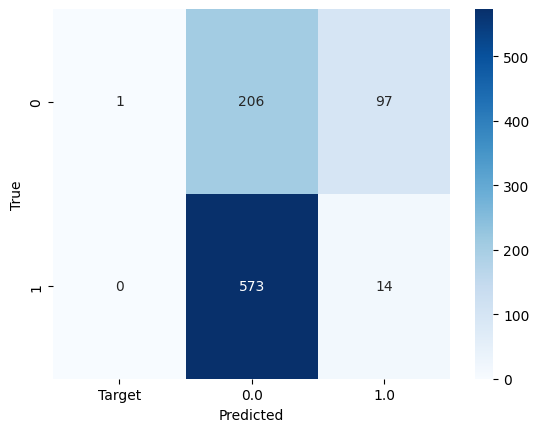

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_5f90b76f7cac, depth=5, numNodes=47, numClasses=2, numFeatures=24
  If (feature 16 <= 0.5)
   If (feature 23 <= 1.905)
    If (feature 6 <= 141.5)
     Predict: 1.0
    Else (feature 6 > 141.5)
     If (feature 22 <= 0.0)
      If (feature 10 <= 7.5)
       Predict: 1.0
      Else (feature 10 > 7.5)
       Predict: 0.0
     Else (feature 22 > 0.0)
      If (feature 18 <= 0.5)
       Predict: 1.0
      Else (feature 18 > 0.5)
       Predict: 0.0
   Else (feature 23 > 1.905)
    If (feature 15 <= 0.5)
     If (feature 3 <= 9124.5)
      Predict: 0.0
     Else (feature 3 > 9124.5)
      If (feature 17 <= 0.5)
       Predict: 0.0
      Else (feature 17 > 0.5)
       Predict: 1.0
    Else (feature 15 > 0.5)
     If (feature 6 <= 140.4)
      Predict: 1.0
     Else (feature 6 > 140.4)
      If (feature 1 <= 17.5)
       Predict: 0.0
      Else (feature 1 > 17.5)
       Predict: 1.0
  Else (feature 16 > 0.5)
   If (feature 19 <= 23.5)

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming seaborn is installed for better visualization
from sklearn.metrics import confusion_matrix


# Create a feature vector
feature_columns = df.columns[:-1]  # Assuming the last column is the target
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = vector_assembler.transform(df)

# Split the data into training and testing sets
(training_data, test_data) = df_assembled.randomSplit([0.8, 0.2], seed=123)

# Create a Decision Tree model
dt = DecisionTreeClassifier(labelCol="Target", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[dt])

# Train the model
model = pipeline.fit(training_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Target", metricName="areaUnderROC")
auc_roc = evaluator.evaluate(predictions)
print(f"AUC-ROC: {auc_roc}")

# Create a MulticlassClassificationEvaluator for accuracy, precision, and recall
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="Target", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Additional metrics using MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "Target").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
conf_matrix = predictions.groupBy("Target", "prediction").count()
conf_matrix.show()

# Calculate additional metrics
TP = conf_matrix.filter("Target = 1 AND prediction = 1.0").collect()[0]["count"]
FP = conf_matrix.filter("Target = 0 AND prediction = 1.0").collect()[0]["count"]
TN = conf_matrix.filter("Target = 0 AND prediction = 0.0").collect()[0]["count"]
FN = conf_matrix.filter("Target = 1 AND prediction = 0.0").collect()[0]["count"]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_pivot = (
    conf_matrix.groupBy("Target")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

tree_model = model.stages[-1]
print(tree_model.toDebugString)


Best Model Metrics:
Accuracy: 0.7528089887640449
Precision: 0.7826478307936818
Recall: 0.752808988764045


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+------+----------+-----+
|Target|prediction|count|
+------+----------+-----+
|     1|       0.0|  206|
|     0|       0.0|  573|
|     1|       1.0|   97|
|     0|       1.0|   14|
+------+----------+-----+

Precision: 0.8738738738738738
Recall: 0.3201320132013201
F1 Score: 0.46859903381642515


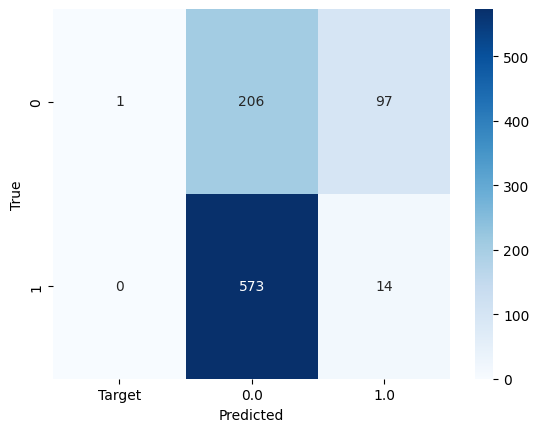

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Define a parameter grid for the Decision Tree model
param_grid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [5, 10, 15]) \
    .addGrid(dt.impurity, ['gini', 'entropy']) \
    .build()

# Define the cross-validator
cross_validator = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator_multiclass,
                                 numFolds=3)

# Perform grid search to find the best parameters
cv_model = cross_validator.fit(training_data)

# Get the best model from the grid search
best_model = cv_model.bestModel

# Make predictions on the test set using the best model
best_predictions = best_model.transform(test_data)

# Evaluate the best model
best_accuracy = evaluator_multiclass.evaluate(best_predictions)
best_precision = evaluator_multiclass.evaluate(best_predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
best_recall = evaluator_multiclass.evaluate(best_predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print("Best Model Metrics:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")

# Additional metrics using MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "Target").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
conf_matrix = predictions.groupBy("Target", "prediction").count()
conf_matrix.show()

# Calculate additional metrics
TP = conf_matrix.filter("Target = 1 AND prediction = 1.0").collect()[0]["count"]
FP = conf_matrix.filter("Target = 0 AND prediction = 1.0").collect()[0]["count"]
TN = conf_matrix.filter("Target = 0 AND prediction = 0.0").collect()[0]["count"]
FN = conf_matrix.filter("Target = 1 AND prediction = 0.0").collect()[0]["count"]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_pivot = (
    conf_matrix.groupBy("Target")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Get the best parameters from the grid search
best_max_depth = best_model.stages[0].getOrDefault('maxDepth')
best_impurity = best_model.stages[0].getOrDefault('impurity')
print(f"Best Parameters:")
print(f"maxDepth: {best_max_depth}")
print(f"Impurity: {best_impurity}")

Best Parameters:
maxDepth: 5
Impurity: gini


In [ ]:
# Get feature importance from the best model (assuming it's a DecisionTreeClassifier)
best_feature_importance = best_model.stages[0].featureImportances.toArray()

# Create a dictionary of feature names and their corresponding importance scores
feature_importance_dict = dict(zip(feature_columns, best_feature_importance))

print("\nFeature Importance:")
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance}")


Feature Importance:
Marital status: 0.0
Application mode: 0.0041787635640314295
Application order: 0.0067436555948463175
Course: 0.01282763658580486
Daytime/evening attendance	: 0.0
Previous qualification: 0.0
Previous qualification (grade): 0.01570490518449039
Nacionality: 0.0
Mother's qualification: 0.0
Father's qualification: 0.0
Mother's occupation: 0.04836460228659346
Father's occupation: 0.0
Admission grade: 0.0
Displaced: 0.0
Educational special needs: 0.0
Debtor: 0.012166617562390278
Tuition fees up to date: 0.617734175081574
Gender: 0.05044580299451276
Scholarship holder: 0.06656137330698421
Age at enrollment: 0.12660399311296153
International: 0.0
Unemployment rate: 0.005566181853521392
Inflation rate: 0.005373683475580827
GDP: 0.027728609396708546


In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.types import StructType, StructField, StringType, DoubleType


# Assuming your SparkSession is named 'spark' and your DataFrame is named 'df'
# Replace the column names accordingly
schema = StructType([
    StructField("Feature", StringType(), True),
    StructField("Importance", DoubleType(), True)
])

# Vector Assembler to create a feature vector
feature_columns = df.columns[:-1]  # Exclude the target column
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_assembled = vector_assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Create a Decision Tree model
dt_classifier = DecisionTreeClassifier(featuresCol="features", labelCol="Target", seed=42)

# Train the model
dt_model = dt_classifier.fit(train_data)

# Get feature importances
feature_importances = dt_model.featureImportances.toArray().tolist()

# Create a DataFrame to display feature importances
feature_importance_df = spark.createDataFrame(zip(feature_columns, feature_importances), ["Feature", "Importance"])

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.orderBy("Importance", ascending=False)

# Show the feature importances
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
spark.conf.set("spark.sql.repl.eagerEval.truncate", 100)

# Show the feature importances
feature_importance_df.show(truncate=False)


**Random Forest**

Accuracy: 0.8457831325301205
AUC-ROC: 0.8932925234133836
Accuracy: 0.8457831325301205
Precision: 0.8464854810948864
Recall: 0.8457831325301205


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+------+----------+-----+
|Target|prediction|count|
+------+----------+-----+
|     1|       0.0|   97|
|     0|       0.0|  523|
|     1|       1.0|  179|
|     0|       1.0|   31|
+------+----------+-----+

Precision: 0.8523809523809524
Recall: 0.6485507246376812
F1 Score: 0.736625514403292


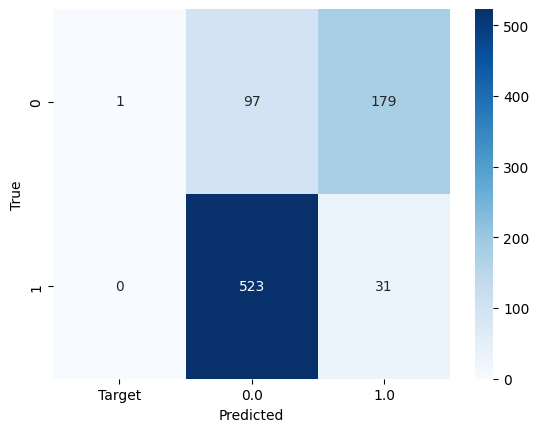

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


feature_columns = df.columns[:-1]

vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the DataFrame to include the features column
df = vector_assembler.transform(df)

# Split the data into training and testing sets (80% training, 20% testing)
(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(labelCol="Target", featuresCol="features", numTrees=10)

# Train the model
rf_model = rf_classifier.fit(training_data)

# Make predictions on the testing data
predictions = rf_model.transform(testing_data)

# Evaluate the model
evaluator = MulticlassClassificationEvaluator(labelCol="Target", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Target", metricName="areaUnderROC")
auc_roc = evaluator.evaluate(predictions)
print(f"AUC-ROC: {auc_roc}")

# Create a MulticlassClassificationEvaluator for accuracy, precision, and recall
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="Target", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Additional metrics using MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "Target").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
conf_matrix = predictions.groupBy("Target", "prediction").count()
conf_matrix.show()

# Calculate additional metrics
TP = conf_matrix.filter("Target = 1 AND prediction = 1.0").collect()[0]["count"]
FP = conf_matrix.filter("Target = 0 AND prediction = 1.0").collect()[0]["count"]
TN = conf_matrix.filter("Target = 0 AND prediction = 0.0").collect()[0]["count"]
FN = conf_matrix.filter("Target = 1 AND prediction = 0.0").collect()[0]["count"]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_pivot = (
    conf_matrix.groupBy("Target")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import pyspark.sql.functions as F

# Assuming you already have 'spark' and 'df'

# Define features
feature_columns = df.columns[:-1]  # Assuming the last column is the target column

# Create a vector assembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(labelCol="Target", featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[vector_assembler, rf])

# Split the data into training and testing sets
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=42)

# Set up parameter grid for tuning
param_grid = ParamGridBuilder().build()

# Set up cross-validator
cross_validator = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid,
                                 evaluator=BinaryClassificationEvaluator(labelCol="Target"),
                                 numFolds=5,
                                 seed=42)

# Train the model
model = cross_validator.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="Target")
area_under_roc = evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})

# Print metrics
print(f"Area Under ROC: {area_under_roc}")

# You can print additional metrics if needed
# For example, precision, recall, f1-score, etc.
precision = predictions.filter((F.col("Target") == 1) & (F.col("prediction") == 1)).count() / predictions.filter(F.col("prediction") == 1).count()
recall = predictions.filter((F.col("Target") == 1) & (F.col("prediction") == 1)).count() / predictions.filter(F.col("Target") == 1).count()

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Create a MulticlassClassificationEvaluator for accuracy, precision, and recall
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="Target", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Additional metrics using MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "Target").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
conf_matrix = predictions.groupBy("Target", "prediction").count()
conf_matrix.show()

# Calculate additional metrics
TP = conf_matrix.filter("Target = 1 AND prediction = 1.0").collect()[0]["count"]
FP = conf_matrix.filter("Target = 0 AND prediction = 1.0").collect()[0]["count"]
TN = conf_matrix.filter("Target = 0 AND prediction = 0.0").collect()[0]["count"]
FN = conf_matrix.filter("Target = 1 AND prediction = 0.0").collect()[0]["count"]

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_pivot = (
    conf_matrix.groupBy("Target")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
roc = model.bestModel.stages[-1].summary.roc.toPandas()
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
df.show(2)

Bootstrap Samples: [4386, 4395, 4336, 4318, 4433, 4404, 4400, 4368, 4375, 4436, 4428, 4387, 4443, 4313, 4484, 4291, 4387, 4349, 4473, 4475, 4479, 4325, 4399, 4421, 4370, 4404, 4393, 4529, 4600, 4411, 4436, 4455, 4350, 4481, 4392, 4565, 4236, 4359, 4490, 4437, 4530, 4507, 4467, 4556, 4501, 4399, 4414, 4417, 4531, 4530, 4320, 4505, 4423, 4360, 4385, 4475, 4480, 4481, 4395, 4476, 4554, 4458, 4474, 4436, 4539, 4367, 4517, 4405, 4378, 4387, 4457, 4398, 4481, 4531, 4349, 4457, 4536, 4512, 4469, 4282, 4432, 4449, 4333, 4525, 4401, 4407, 4385, 4481, 4423, 4354, 4390, 4433, 4299, 4356, 4483, 4393, 4478, 4421, 4361, 4400]
Accuracy: 0.8626506024096385
Precision: 0.875
Recall: 0.6847826086956522
F1 Score: 0.7682926829268292
Area Under ROC Curve: 0.9049697849631138


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+------+----------+-----+
|Target|prediction|count|
+------+----------+-----+
|     1|       0.0|   87|
|     0|       0.0|  527|
|     1|       1.0|  189|
|     0|       1.0|   27|
+------+----------+-----+



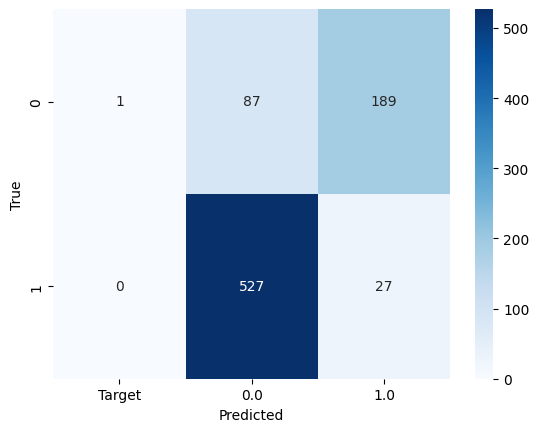

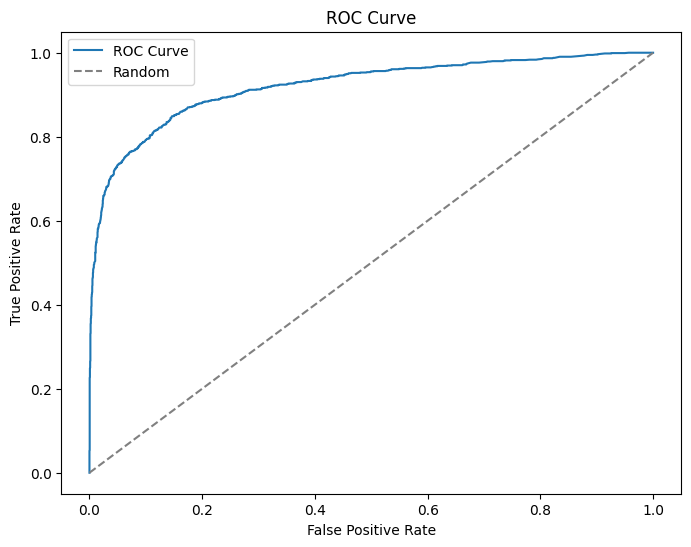

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import StructType, StructField, IntegerType, DoubleType

# Define the schema of the DataFrame (replace 'YourColumnName' with actual column names and types)
schema = StructType([
    StructField("Marital status", IntegerType(), True),
    StructField("Application mode", IntegerType(), True),
    # Add more fields as needed
    StructField("Target", IntegerType(), True)  # Target column
])



# Set the number of bootstrap samples
num_bootstrap_samples = 100

# Perform bootstrap sampling
bootstrap_samples = []

for i in range(num_bootstrap_samples):
    # Sample with replacement
    sampled_df = df.sample(withReplacement=True, fraction=1.0, seed=i)

    # Perform operations on the sampled DataFrame (replace with your actual operations)
    # For example, you can fit a model, perform calculations, etc.
    # For this example, we are just counting the number of rows in the sampled DataFrame
    result = sampled_df.count()

    # Append the result to the list of bootstrap samples
    bootstrap_samples.append(result)

# Display the bootstrap samples
print("Bootstrap Samples:", bootstrap_samples)

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'Target' is the label column
feature_columns = df.columns[:-1]  # Exclude the 'Target' column
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
df_assembled = assembler.transform(df)

# Split the data into training and testing sets
train_data, test_data = df_assembled.randomSplit([0.8, 0.2], seed=42)

# Define and train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(labelCol='Target', featuresCol='features', numTrees=100, seed=42)
rf_model = rf_classifier.fit(train_data)

# Make predictions on the test data
predictions = rf_model.transform(test_data)

# Convert Spark DataFrame to Pandas DataFrame for scikit-learn metrics
predictions_pd = predictions.select('Target', 'prediction').toPandas()

# Calculate metrics using scikit-learn
y_true = predictions_pd['Target']
y_pred = predictions_pd['prediction']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Evaluate using BinaryClassificationEvaluator for areaUnderROC
evaluator = BinaryClassificationEvaluator(labelCol='Target')
roc_auc = evaluator.evaluate(predictions)
print(f"Area Under ROC Curve: {roc_auc}")

# Additional metrics using MulticlassMetrics
predictionAndLabels = predictions.select("prediction", "Target").rdd
metrics = MulticlassMetrics(predictionAndLabels)

# Confusion matrix
conf_matrix = predictions.groupBy("Target", "prediction").count()
conf_matrix.show()
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix_pivot = (
    conf_matrix.groupBy("Target")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

roc = model.bestModel.stages[-1].summary.roc.toPandas()
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler


# Assemble features into a vector column
feature_columns = df.columns[1:-1]  # Assuming the last column is the target
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df = assembler.transform(df)

# Standardize features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)

# Rename the 'Target' column to 'label'
df = df.withColumnRenamed("Target", "label")

# Split the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

# Create a Random Forest model
rf = RandomForestClassifier(labelCol="label", featuresCol="scaled_features", numTrees=50, maxDepth=5)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Evaluate the model
evaluator = BinaryClassificationEvaluator()
area_under_curve = evaluator.evaluate(predictions)
print(f"Area Under ROC Curve (AUC): {area_under_curve}")

# Create a MulticlassClassificationEvaluator for accuracy, precision, and recall
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

roc = model.stages[-1].summary.roc.toPandas()
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# ... (previous code)

# Create a Random Forest model
rf = RandomForestClassifier(labelCol="label", featuresCol="scaled_features", numTrees=50, maxDepth=5)

# Create a pipeline
pipeline = Pipeline(stages=[rf])

# Define a parameter grid for fine-tuning
param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

# Create a CrossValidator
evaluator_multiclass = MulticlassClassificationEvaluator(labelCol="label", metricName="accuracy")
crossval = CrossValidator(estimator=pipeline,
                          estimatorParamMaps=param_grid,
                          evaluator=evaluator_multiclass,
                          numFolds=3)  # You can adjust the number of folds

# Run cross-validation to fine-tune the model
cv_model = crossval.fit(train_data)

# Make predictions on the test set
predictions = cv_model.transform(test_data)

# Evaluate the model
accuracy = evaluator_multiclass.evaluate(predictions)
precision = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedPrecision"})
recall = evaluator_multiclass.evaluate(predictions, {evaluator_multiclass.metricName: "weightedRecall"})

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Access the best model from cross-validation
best_model = cv_model.bestModel

# Plot the confusion matrix using seaborn
conf_matrix_pivot = (
    best_model.transform(test_data)
    .groupBy("label", "prediction")
    .count()
    .groupBy("label")
    .pivot("prediction")
    .agg(f.sum("count"))
    .fillna(0)
)
conf_matrix_pandas = conf_matrix_pivot.toPandas()

sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

roc = model.stages[-1].summary.roc.toPandas()
plt.figure(figsize=(8, 6))
plt.plot(roc['FPR'], roc['TPR'], label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Area Under ROC Curve (AUC): 0.914171740853816
Precision: 0.864292575756036
Recall: 0.8640449438202248
F1 Score: 0.8603016469630098
Accuracy: 0.8640449438202247


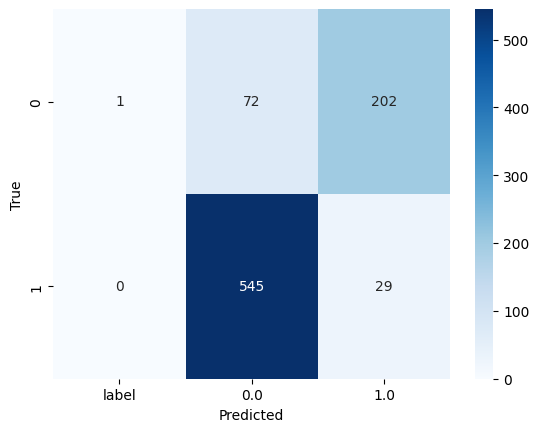

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

#Changing the target outcomes:
df = df.withColumn(
    "Target",
    f.when((f.col("Target") == "Graduate") | (f.col("Target") == "Enrolled"), "Didnot Dropout").otherwise(f.col("Target")))
#Change to 0 and 1:
df = df.withColumn(
    "Target",
    f.when(f.col("Target") == "Didnot Dropout", 0).otherwise(1))

from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.sql import SparkSession
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


# Assuming your target column is named "Target"
target_column = "Target"

# Assuming you have already converted your pandas DataFrame to a Spark DataFrame named "df"
# Features are all columns except the target column
feature_columns = [col for col in df.columns if col != target_column]

# VectorAssembler to assemble features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# GBTClassifier
gbt = GBTClassifier(labelCol=target_column, featuresCol="features")

# Create a pipeline
pipeline = Pipeline(stages=[assembler, gbt])

# Split the data into training and testing sets
(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=123)

# Create a parameter grid for tuning
param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxDepth, [5, 10]) \
    .addGrid(gbt.maxBins, [32, 64]) \
    .addGrid(gbt.maxIter, [10, 20]) \
    .build()

# Binary Classification Evaluator
evaluator = BinaryClassificationEvaluator(labelCol=target_column)

# CrossValidator with 5-fold cross-validation
cross_validator = CrossValidator(estimator=pipeline,
                                 estimatorParamMaps=param_grid,
                                 evaluator=evaluator,
                                 numFolds=5)

# Train the model
model = cross_validator.fit(training_data)

# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
area_under_curve = evaluator.evaluate(predictions)
print(f"Area Under ROC Curve (AUC): {area_under_curve}")

# You can also access the best model from the cross-validation results
best_model = model.bestModel

# Optionally, you can save the best model for later use
best_model.save("best_gbt_model")
multiclass_evaluator = MulticlassClassificationEvaluator(labelCol=target_column, metricName="f1")

precision = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedPrecision"})
recall = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "weightedRecall"})
f1 = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "f1"})
accuracy = multiclass_evaluator.evaluate(predictions, {multiclass_evaluator.metricName: "accuracy"})

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")

sns.heatmap(conf_matrix_pandas, annot=True, fmt='g', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Access the best model from the cross-validation results
best_model = model.bestModel

# Access the GBT model from the pipeline stages
gbt_model = best_model.stages[-1]

# Print the parameters of the GBT model
print("GBT Model Parameters:")
print(f"Number of Trees: {gbt_model.getNumTrees}")
print(f"Maximum Depth: {gbt_model.getOrDefault('maxDepth')}")
print(f"Maximum Bins: {gbt_model.getOrDefault('maxBins')}")
print(f"Maximum Iterations: {gbt_model.getOrDefault('maxIter')}")
print(f"Step Size: {gbt_model.getOrDefault('stepSize')}")


GBT Model Parameters:
Number of Trees: 20
Maximum Depth: 5
Maximum Bins: 64
Maximum Iterations: 20
Step Size: 0.1


# Indra - EDA and Multi-Layered Perceptron

In [ ]:
df_source = pd.read_csv('https://ninamargaritaindrapriya.s3.us-east-2.amazonaws.com/education_data.csv',
                         delimiter = ';') # this is a tab-delimited file

# convert pandas df to spark df
df = spark.createDataFrame(df_source)

In [ ]:
from pyspark.sql.functions import col, when
import pandas as pd

# Convert DataFrame to Pandas for mapping
stu_data_label = df.toPandas()

# Apply the mappings using Pandas map function
stu_data_label['Marital status'] = stu_data_label['Marital status'].map(marital_status_mapping)
stu_data_label['Application mode'] = stu_data_label['Application mode'].map(application_mode_mapping)
stu_data_label['Course'] = stu_data_label['Course'].map(course_mapping)
stu_data_label['Daytime/evening attendance\t'] = stu_data_label['Daytime/evening attendance\t'].map(daytime_evening_attendance_mapping)
stu_data_label['Previous qualification'] = stu_data_label['Previous qualification'].map(previous_qualification_mapping)
stu_data_label['Nacionality'] = stu_data_label['Nacionality'].map(nationality_mapping)
stu_data_label["Mother's qualification"] = stu_data_label["Mother's qualification"].map(mothers_qualification_mapping)
stu_data_label["Father's qualification"] = stu_data_label["Father's qualification"].map(fathers_qualification_mapping)
stu_data_label["Mother's occupation"] = stu_data_label["Mother's occupation"].map(mothers_occupation_mapping)
stu_data_label["Father's occupation"] = stu_data_label["Father's occupation"].map(fathers_occupation_mapping)
stu_data_label['Displaced'] = stu_data_label['Displaced'].map(displaced_mapping)
stu_data_label['Educational special needs'] = stu_data_label['Educational special needs'].map(education_special_needs_mapping)
stu_data_label['Debtor'] = stu_data_label['Debtor'].map(debtor_mapping)
stu_data_label['Tuition fees up to date'] = stu_data_label['Tuition fees up to date'].map(tuition_fees_mapping)
stu_data_label['Gender'] = stu_data_label['Gender'].map(gender_mapping)
stu_data_label['Scholarship holder'] = stu_data_label['Scholarship holder'].map(scholarship_holder_mapping)
stu_data_label['International'] = stu_data_label['International'].map(international_mapping)

# Convert back to Spark DataFrame
stu_data_label = spark.createDataFrame(stu_data_label)

# Show the updated DataFrame
stu_data_label.show()

In [ ]:
for i in [ 'Application order',
 'Daytime/evening attendance	',
 'Displaced',
 'Educational special needs',
 'Debtor',
 'Tuition fees up to date',
 'Gender',
 'Scholarship holder',
 'Age at enrollment',
 'International',
 'Curricular units 1st sem (credited)',
 'Curricular units 1st sem (enrolled)',
 'Curricular units 1st sem (evaluations)',
 'Curricular units 1st sem (approved)',
 'Curricular units 1st sem (grade)',
 'Curricular units 1st sem (without evaluations)',
 'Curricular units 2nd sem (credited)',
 'Curricular units 2nd sem (enrolled)',
 'Curricular units 2nd sem (evaluations)',
 'Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (grade)',
 'Curricular units 2nd sem (without evaluations)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']:
  stu_data_label = stu_data_label.withColumn(i, col(i).cast("float"))

In [ ]:
student_data = df.copy()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np

from pyspark.sql.functions import when
from pyspark.sql.types import IntegerType

stu_data_label = stu_data_label.withColumn('label', when(stu_data_label['Target'] == 'Dropout', 1).otherwise(0).cast(IntegerType()))
student_data = student_data.withColumn('label', when(student_data['Target'] == 'Dropout', 1).otherwise(0).cast(IntegerType()))

# Display the updated DataFrame
stu_data_label.show()

+--------------+--------------------+-----------------+--------------------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+--------------------+--------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+-----+
|Marital status|    Application mode|Application order|              Course|Daytime/evening

## Demographic data

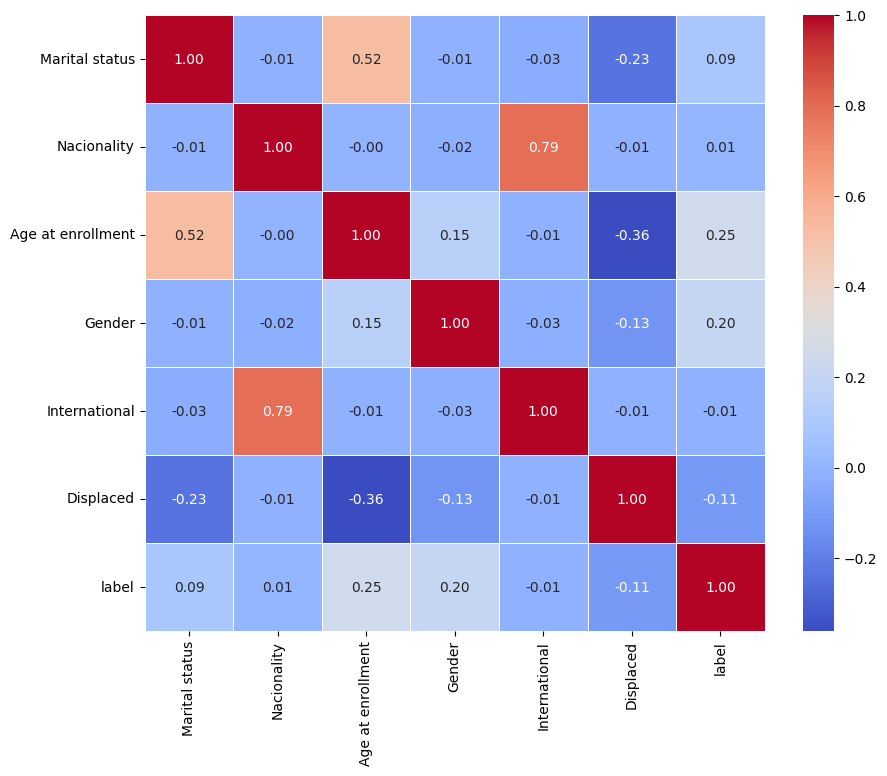

In [ ]:
import seaborn as sns
from pyspark.ml.feature import VectorAssembler

selected_columns = ['Marital status', 'Nacionality', 'Age at enrollment', 'Gender', 'International', 'Displaced', 'label']
pandas_df = df.select(*selected_columns).toPandas()

# Calculate correlation matrix
corrm = pandas_df.corr()

# Plot the heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corrm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

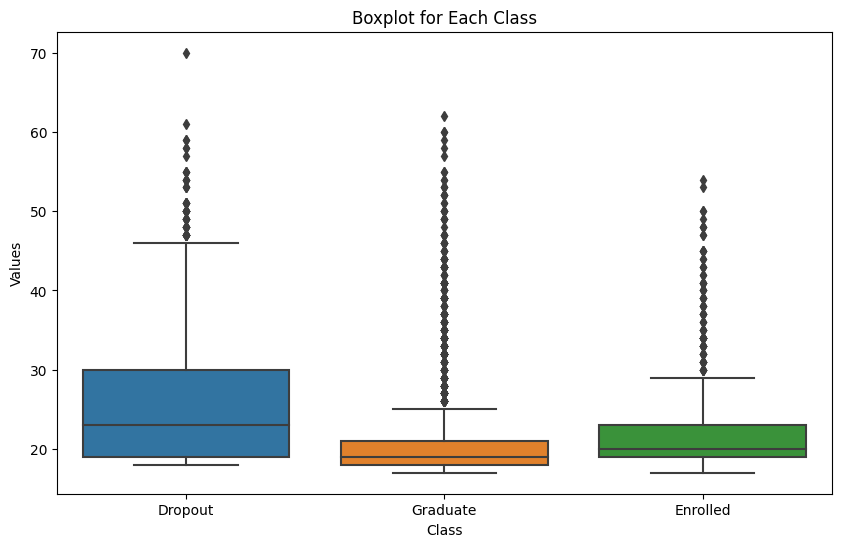

In [ ]:
plot_data = df.toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Age at enrollment', data=plot_data)
plt.title('Boxplot for Each Class')
plt.xlabel('Class')
plt.ylabel('Values')
plt.show()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, when
import matplotlib.pyplot as plt
import seaborn as sns

def plot_grouped_counts(data, group_column, target_column):
    # Calculate counts for each group and target combination
    grouped_counts = data.groupBy(group_column, target_column).agg(count('*').alias('count'))

    # Calculate total counts for each group
    total_counts = data.groupBy(group_column).agg(count('*').alias('total_count'))

    # Join the two DataFrames and calculate the ratio
    grouped_data = (
        grouped_counts
        .join(total_counts, group_column, 'left_outer')
        .withColumn('ratio', when(total_counts['total_count'] != 0, grouped_counts['count'] / total_counts['total_count']).otherwise(0))
        .groupBy(group_column)
        .pivot(target_column)
        .agg({'ratio': 'first'})
        .fillna(0)
    )

    # Convert to Pandas for plotting
    grouped_data_pd = grouped_data.toPandas().set_index(grouped_data.toPandas().iloc[:, 0].name)

    # Plot the bar chart using Seaborn
    grouped_data_pd.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
    plt.title(f"Distribution of Classes for Each {group_column} (Bar Chart)")
    plt.xlabel(group_column)
    plt.ylabel("Count")
    plt.show()

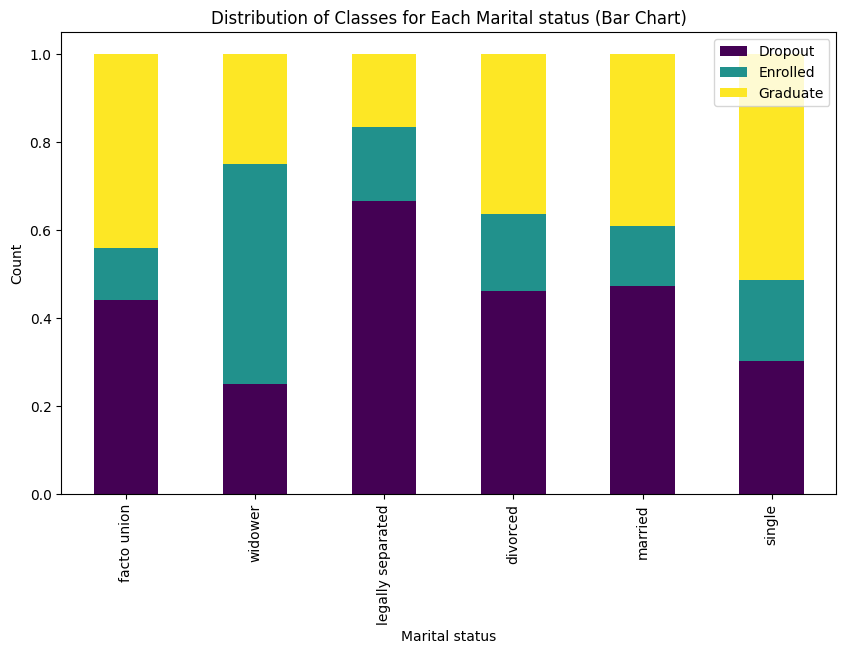

In [ ]:
# Plot a bar chart
plot_grouped_counts(stu_data_label, 'Marital status', 'Target')

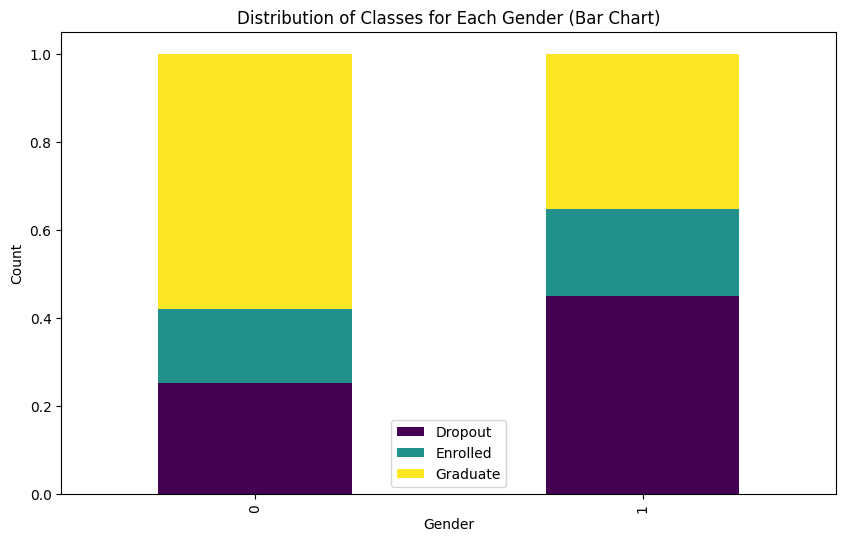

In [ ]:
# Plot a bar chart
plot_grouped_counts(student_data, 'Gender', 'Target')

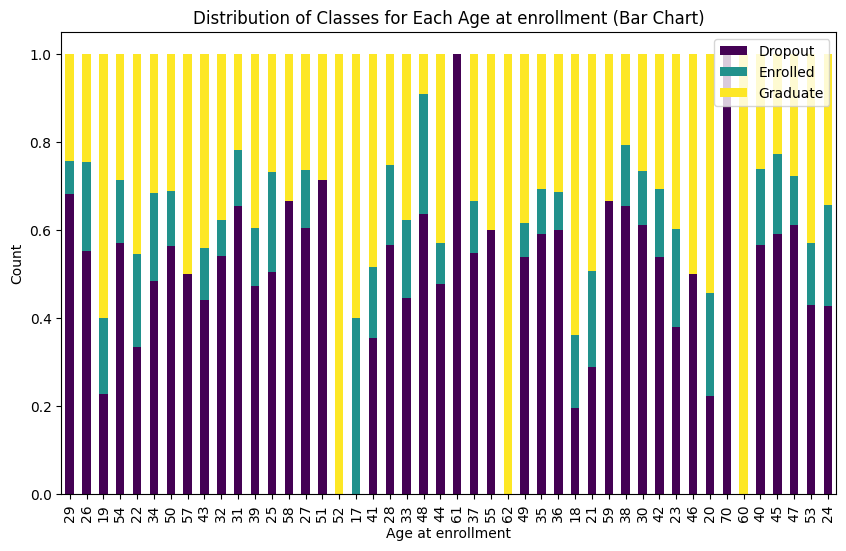

In [ ]:
# Plot a bar chart
plot_grouped_counts(student_data, 'Age at enrollment', 'Target')

## Socioeconomic Data

<Axes: >

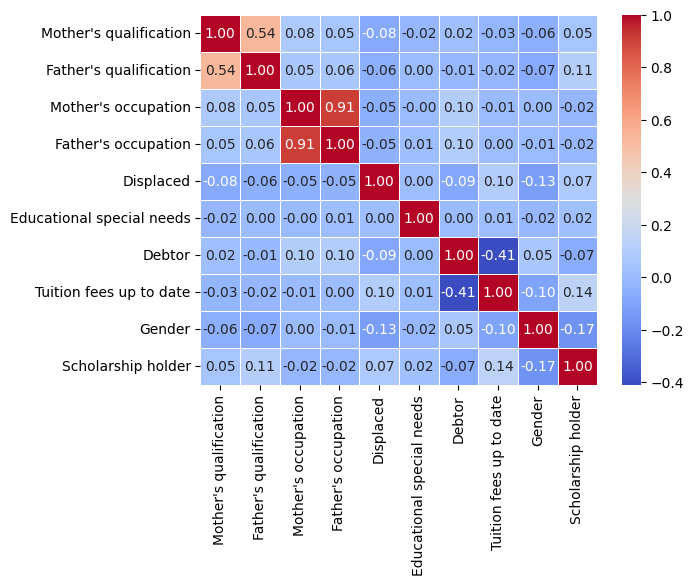

In [ ]:
import seaborn as sns

corrm = student_data.toPandas()[["Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation", 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder']].corr()
sns.heatmap(corrm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

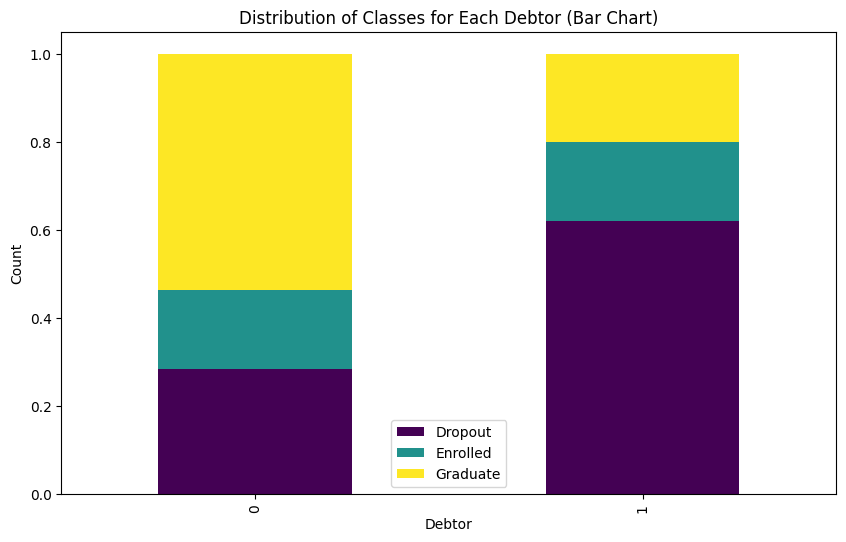

In [ ]:
# Plot a bar chart
plot_grouped_counts(student_data, 'Debtor', 'Target')

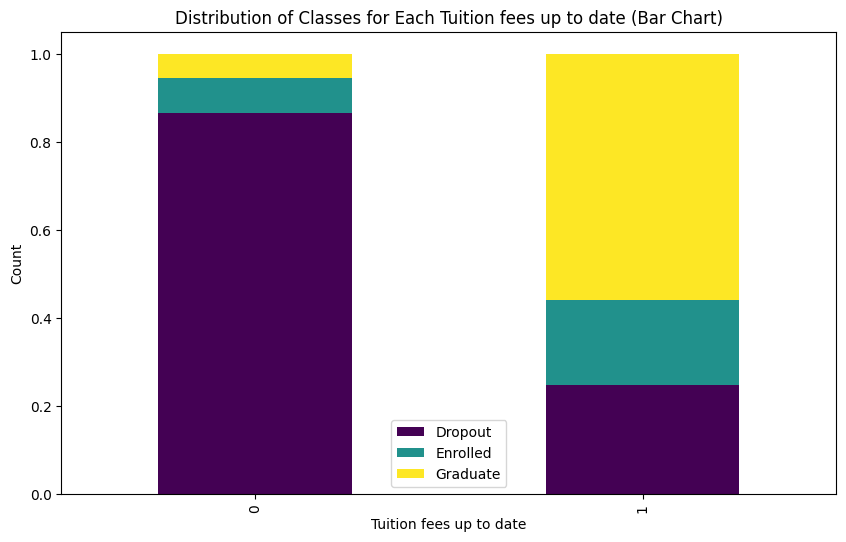

In [ ]:
# Plot a bar chart
plot_grouped_counts(student_data, 'Tuition fees up to date', 'Target')

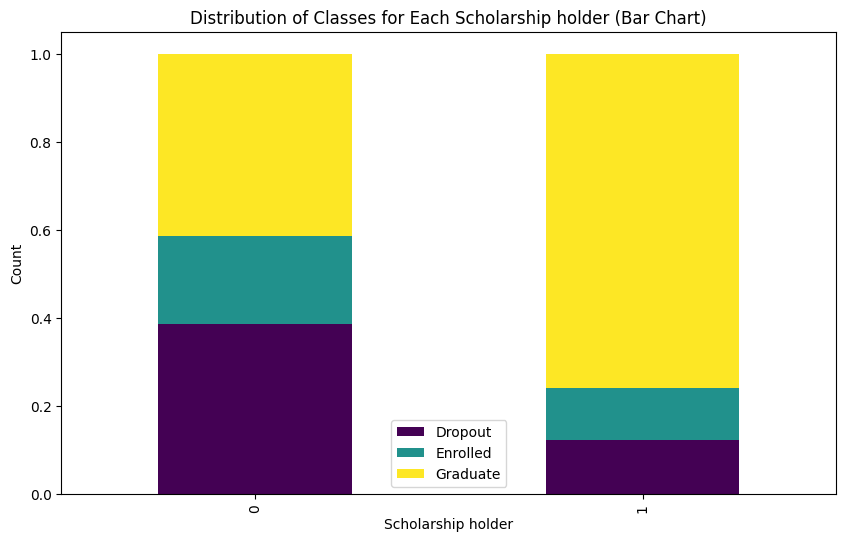

In [ ]:
# Plot a bar chart
plot_grouped_counts(student_data, 'Scholarship holder', 'Target')

In [ ]:
graduate_data = stu_data_label.filter(col('Target') == 'Graduate')

# Group by "Mother's occupation" and count occurrences of 'Course'
grouped_counts = graduate_data.groupBy("Mother's occupation").agg({'Course': 'count'})

# Sort the values and take the top 20
top_20_counts = (
    grouped_counts
    .orderBy('count(Course)', ascending=False)
    .limit(20)
)

# Display the resulting DataFrame
top_20_counts.show()

+--------------------+-------------+
| Mother's occupation|count(Course)|
+--------------------+-------------+
|   Unskilled Workers|          823|
|Administrative Staff|          422|
|Personal Services...|          280|
|Intermediate Leve...|          177|
|Skilled Workers i...|          144|
|Specialists in In...|          138|
|Farmers and Skill...|           51|
|Representatives o...|           48|
|             Student|           44|
|     Other Situation|           19|
|    Cleaning Workers|           15|
|Installation and ...|           14|
|Office Workers, S...|            4|
|Other Administrat...|            4|
|Meal Preparation ...|            3|
|Unskilled Workers...|            3|
|            Teachers|            3|
|Unskilled Workers...|            2|
|             (Blank)|            2|
|Workers in Food P...|            2|
+--------------------+-------------+



In [ ]:
graduate_data = stu_data_label.filter(col('Target') == 'Dropout')

# Group by "Mother's occupation" and count occurrences of 'Course'
grouped_counts = graduate_data.groupBy("Mother's occupation").agg({'Course': 'count'})

# Sort the values and take the top 20
top_20_counts = (
    grouped_counts
    .orderBy('count(Course)', ascending=False)
    .limit(20)
)

# Display the resulting DataFrame
top_20_counts.show()

+--------------------+-------------+
| Mother's occupation|count(Course)|
+--------------------+-------------+
|   Unskilled Workers|          490|
|Administrative Staff|          248|
|Personal Services...|          156|
|Specialists in In...|          102|
|             Student|           99|
|Intermediate Leve...|           95|
|Skilled Workers i...|           80|
|     Other Situation|           51|
|Representatives o...|           39|
|Farmers and Skill...|           26|
|Installation and ...|           15|
|             (Blank)|           13|
|            Teachers|            2|
|Workers in Food P...|            1|
|Meal Preparation ...|            1|
|Armed Forces Prof...|            1|
|Intermediate Leve...|            1|
|Unskilled Workers...|            1|
+--------------------+-------------+



## Macroeconomic data

<Axes: >

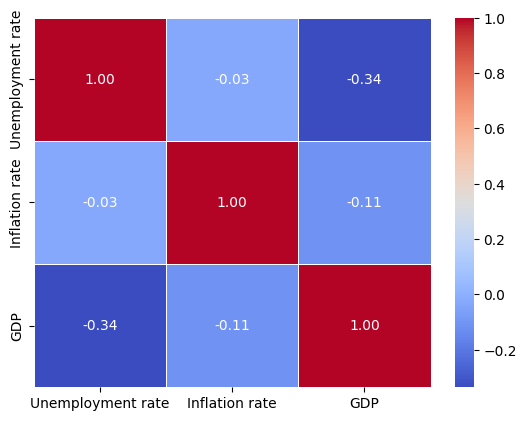

In [ ]:
import seaborn as sns

corrm = student_data.toPandas()[['Unemployment rate', 'Inflation rate', 'GDP']].corr()
sns.heatmap(corrm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

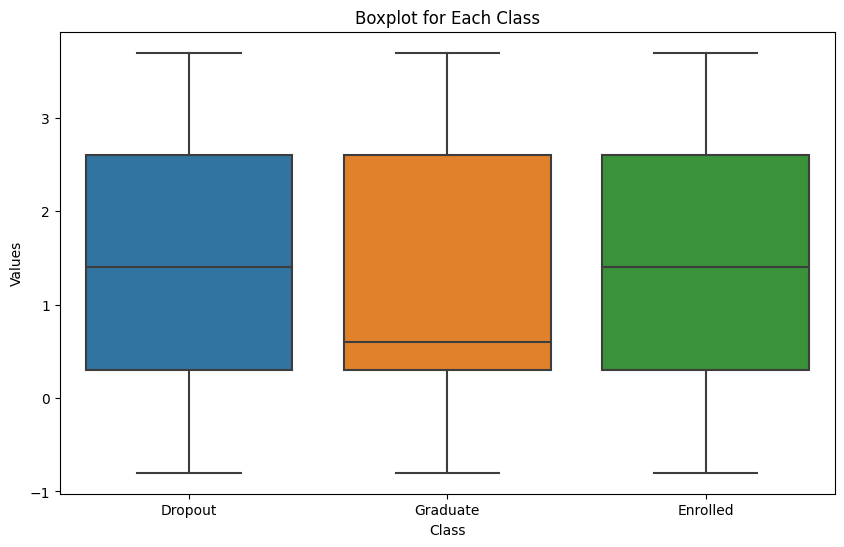

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Inflation rate', data=student_data.toPandas())
plt.title('Boxplot for Each Class')
plt.xlabel('Class')
plt.ylabel('Values')
plt.show()

## Enrollment academic factors

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


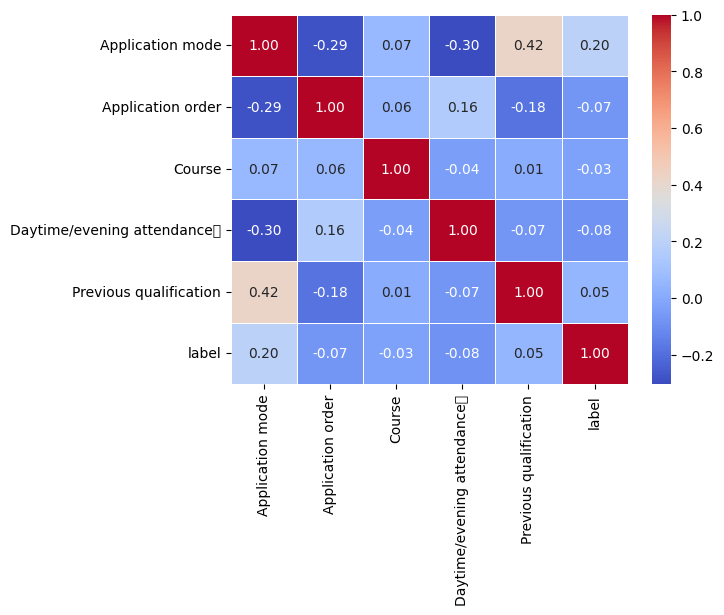

In [ ]:
import seaborn as sns

corrm = student_data.toPandas()[['Application mode', 'Application order',
       'Course', 'Daytime/evening attendance	', 'Previous qualification', 'label']].corr()
sns.heatmap(corrm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

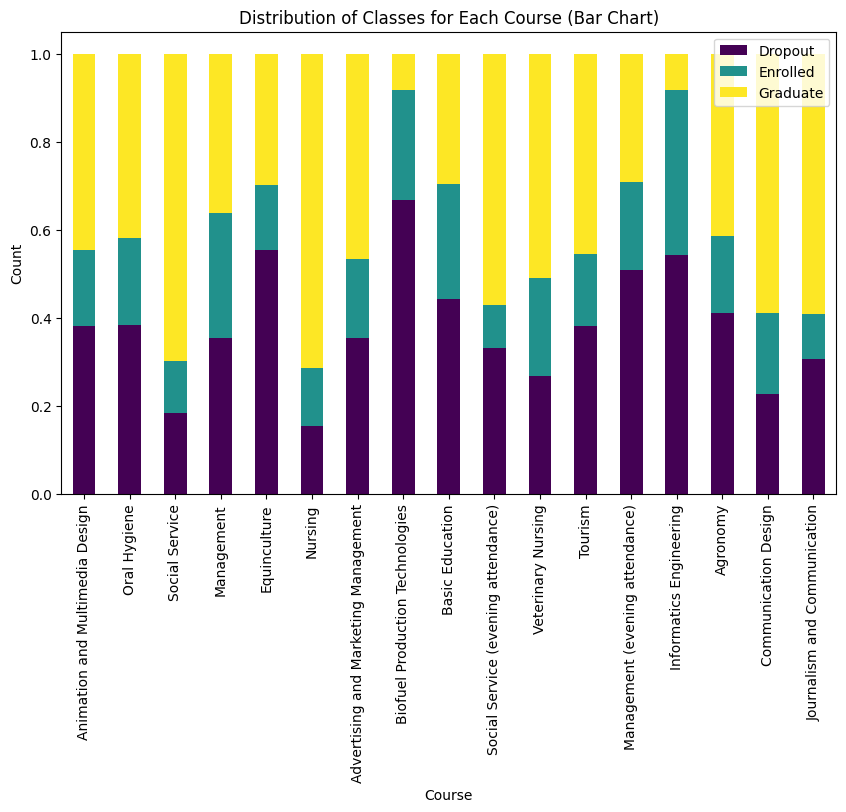

In [ ]:
# Plot a bar chart
plot_grouped_counts(stu_data_label, 'Course', 'Target')

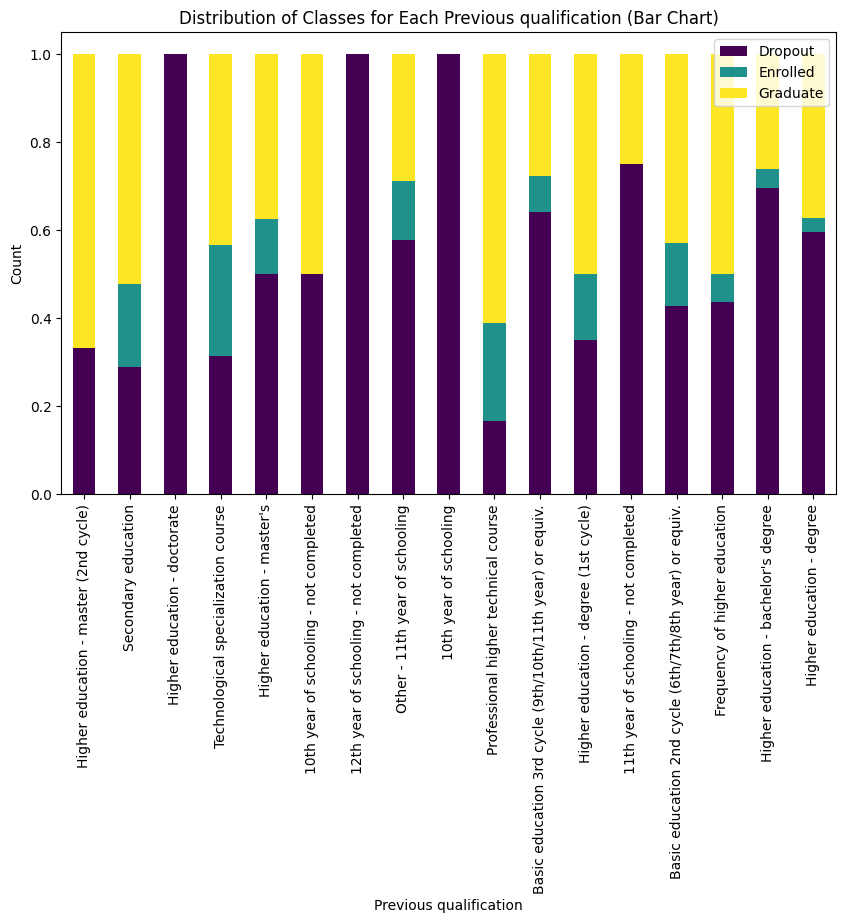

In [ ]:
# Plot a bar chart
plot_grouped_counts(stu_data_label, 'Previous qualification', 'Target')

## Academic Performance



<Axes: >

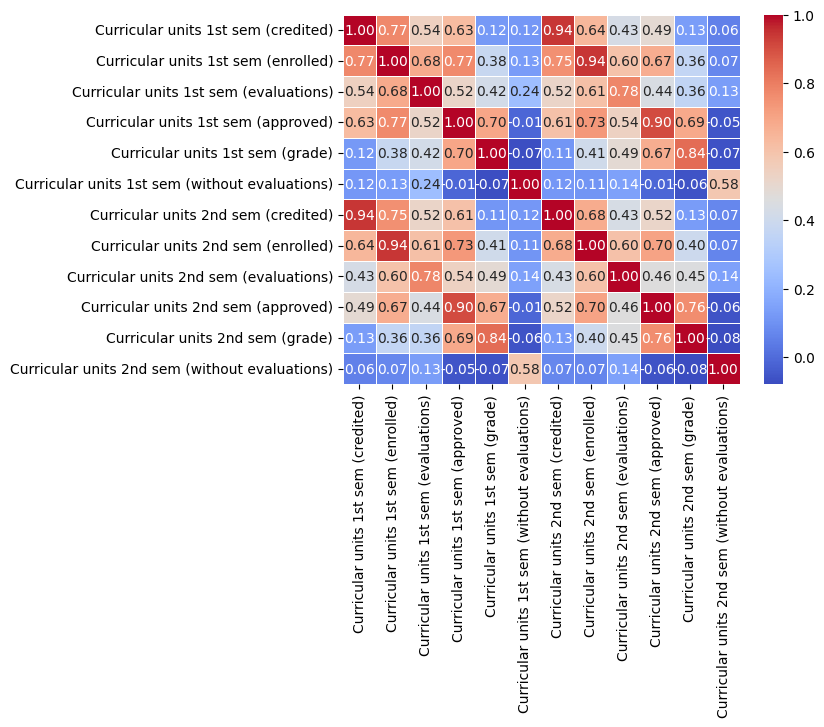

In [ ]:
corrm = student_data.toPandas()[['Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']].corr()
sns.heatmap(corrm, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

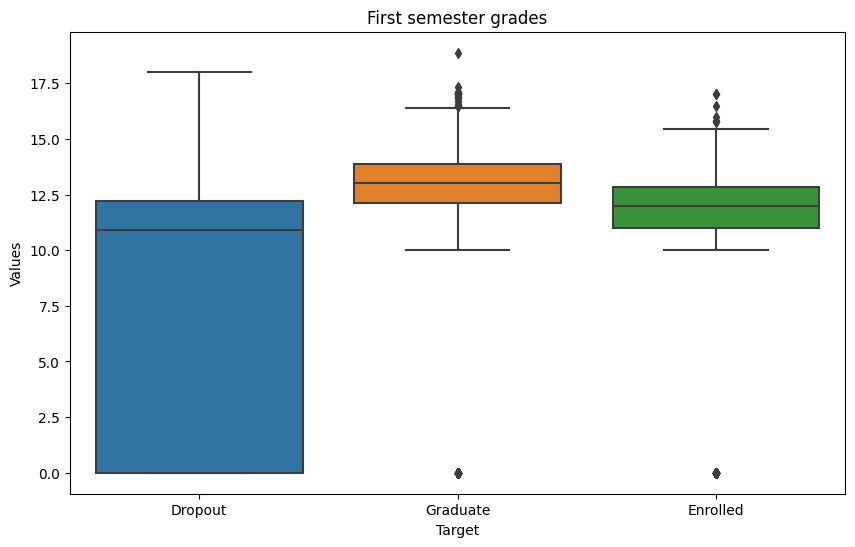

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y='Curricular units 1st sem (grade)', data=student_data.toPandas())
plt.title('First semester grades')
plt.xlabel('Target')
plt.ylabel('Values')
plt.show()

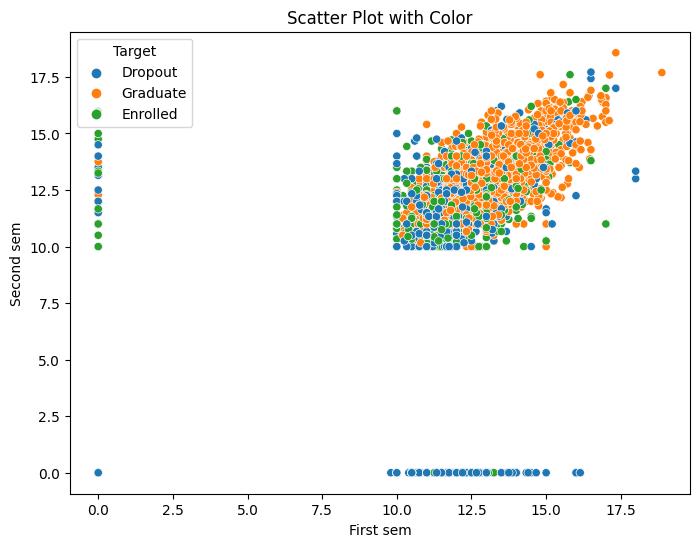

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 6))
scatter_plot = sns.scatterplot(x="Curricular units 1st sem (grade)", y="Curricular units 2nd sem (grade)", hue="Target", data=student_data.toPandas())

# Customize plot labels and title
plt.xlabel("First sem")
plt.ylabel("Second sem")
plt.title("Scatter Plot with Color")
plt.show()

## Deep Learning with Pyspark

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder

categorical_columns = ['Marital status', 'Application mode', 'Course', 'Previous qualification',
       'Nacionality', "Mother's qualification", "Father's qualification",
       "Mother's occupation", "Father's occupation"]

# Create a list of StringIndexer stages for each categorical column
indexers = [StringIndexer(inputCol=column, outputCol=column + "Index", handleInvalid="keep") for column in categorical_columns]

# Create a list of OneHotEncoder stages for each indexed column
encoders = [OneHotEncoder(inputCols=[column + "Index"], outputCols=[column + "OneHot"]) for column in categorical_columns]

# Combine the indexers and encoders into a single list of stages
stages = indexers + encoders

# Create a pipeline with all the stages
pipeline = Pipeline(stages=stages)

df_onehot = pipeline.fit(df).transform(df)

In [ ]:
df_onehot.show(10)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+-----+-------------------+---------------------+-----------+---------------------------+----------------+-------------

In [ ]:
assembler = feature.VectorAssembler(inputCols=[column + "OneHot" for column in categorical_columns], outputCol="features_onehot")
df_onehot = assembler.transform(df_onehot)

In [ ]:
assembler = feature.VectorAssembler(inputCols=[
            'Application order',
            'CourseOneHot',
            'Daytime/evening attendance	',
            'Displaced',
            'Educational special needs',
            'Debtor',
            'Tuition fees up to date',
            'Gender',
            'Scholarship holder',
            'Age at enrollment',
            'International',
            'Curricular units 1st sem (credited)',
            'Curricular units 1st sem (enrolled)',
            'Curricular units 1st sem (evaluations)',
            'Curricular units 1st sem (approved)',
            'Curricular units 1st sem (grade)',
            'Curricular units 1st sem (without evaluations)',
            'Curricular units 2nd sem (credited)',
            'Curricular units 2nd sem (enrolled)',
            'Curricular units 2nd sem (evaluations)',
            'Curricular units 2nd sem (approved)',
            'Curricular units 2nd sem (grade)',
            'Curricular units 2nd sem (without evaluations)',
            'Unemployment rate',
            'Inflation rate',
            'GDP'], outputCol="features_numeric")

df = assembler.transform(df_onehot)

In [ ]:
assembler = feature.VectorAssembler(inputCols=['features_numeric', 'features_onehot'], outputCol = 'features')
df = assembler.transform(df)

In [ ]:
df.show(20)

+--------------+----------------+-----------------+------+----------------------------+----------------------+------------------------------+-----------+----------------------+----------------------+-------------------+-------------------+---------------+---------+-------------------------+------+-----------------------+------+------------------+-----------------+-------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------+--------------+-----+--------+-----+-------------------+---------------------+-----------+---------------------------+----------------+-------------

In [ ]:
df = df.select("features", "Target")

In [ ]:
from pyspark.ml.linalg import DenseVector

df = df.rdd.map(lambda x: (DenseVector(x[0]), x[1]))\
                          .toDF(['features',
                                'target'])

In [ ]:
df = df.withColumn("target", when(col("target") == "Dropout", 1).otherwise(0))

In [ ]:
training, testing = df\
    .randomSplit([0.7, 0.3], seed = 62)

In [ ]:
[training.count(), testing.count()]

[3089, 1335]

In [ ]:
training.groupBy('target').count().withColumn('pct', f.round(f.col('count')/f.lit(training.count()), 2)).show()
testing.groupBy('target').count().withColumn('pct', f.round(f.col('count')/f.lit(testing.count()), 2)).show()

+------+-----+----+
|target|count| pct|
+------+-----+----+
|     1|  988|0.32|
|     0| 2107|0.68|
+------+-----+----+

+------+-----+----+
|target|count| pct|
+------+-----+----+
|     1|  433|0.33|
|     0|  896|0.67|
+------+-----+----+



In [ ]:
category_to_number_model = feature.StringIndexer(inputCol = 'target',
                                                 outputCol = 'label')\
    .fit(training)

In [ ]:
list(enumerate(category_to_number_model.labels))

[(0, '0'), (1, '1')]

In [ ]:
mlp = classification.MultilayerPerceptronClassifier(seed = 1870).\
    setStepSize(0.1).\
    setMaxIter(500).\
    setFeaturesCol('features')

In [ ]:
mlp = mlp.setLayers([262, 2])

In [ ]:
mlp_simple_model = Pipeline(
    stages = [category_to_number_model, mlp]).\
    fit(training)

In [ ]:
test_prediction = mlp_simple_model\
  .transform(testing)

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator_f1.evaluate(test_prediction)
print(f"F1 Score: {f1_score}")

evaluator_acc = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator_acc.evaluate(test_prediction)
print(f"Accuracy Score: {accuracy}")

evaluator_recall = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedRecall")
recall = evaluator_recall.evaluate(test_prediction)
print(f"Recall: {recall}")

evaluator_precision = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="weightedPrecision")
precision = evaluator_precision.evaluate(test_prediction)
print(f"Precision: {precision}")

F1 Score: 0.8813218241168352
Accuracy Score: 0.8833709556057185
Recall: 0.8833709556057185
Precision: 0.8818803461996702


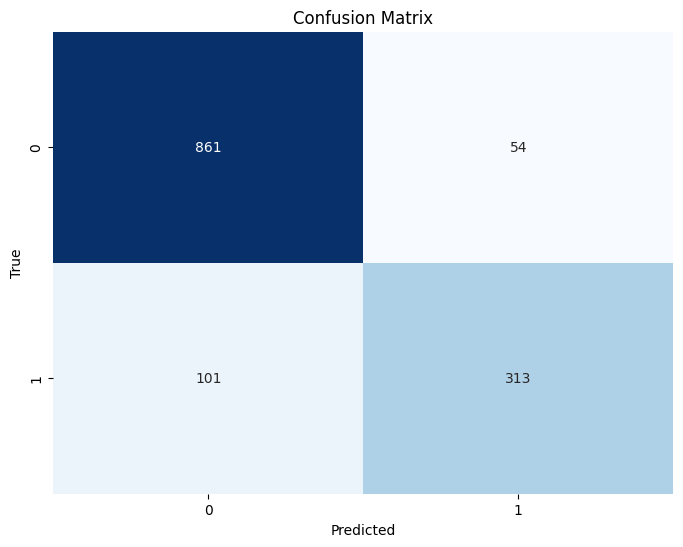

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a confusion matrix
matrix = test_prediction.select("label", "prediction").toPandas()
cm = confusion_matrix(matrix['label'], matrix['prediction'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
predictionAndLabels = test_prediction.rdd.map(lambda lp: (lp.prediction, lp.label))
metrics = BinaryClassificationMetrics(predictionAndLabels)

In [ ]:
# Area under precision-recall curve
print("Area under PR = %s" % metrics.areaUnderPR)

# Area under ROC curve
print("Area under ROC = %s" % metrics.areaUnderROC)

Area under PR = 0.7868269646164037
Area under ROC = 0.848511126950186
